In [139]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import re
%matplotlib inline
import matplotlib.pyplot as plt
data=pd.read_csv('Desktop/Data/EXL intern/dataf.csv')
df=data.copy()

In [140]:
#Libraries for vectorisation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from fuzzywuzzy import fuzz

#Libraries for clustering
from sklearn.cluster import KMeans

In [141]:
txt=df['1_string_lem']

In [142]:
#Bag of words
vectorizer_cv = CountVectorizer(analyzer='word')
X_cv = vectorizer_cv.fit_transform(txt)

In [143]:
matrix=pd.concat([txt,pd.DataFrame(X_cv.toarray(), columns=vectorizer_cv.get_feature_names())], axis=1)
matrix.head()

,1_string_lem,aand,abd,abide,ability,able,aboard,abreast,abs,absolute,...,youlove,young,youngster,youthanks,yrs,yup,zerbo,zero,znd,zulu
0,fast service good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,totally happy unsure applying help consolidate...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,quick efficient obtaining speedy manner,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,easy work secure fast,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,pleased simple quick process associates contac...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
#TF-IDF (word level)
vectorizer_wtf = TfidfVectorizer(analyzer='word')
X_wtf = vectorizer_wtf.fit_transform(txt)

In [145]:
#TF-IDF (n-gram level)
vectorizer_ntf = TfidfVectorizer(analyzer='word',ngram_range=(1,2))
X_ntf = vectorizer_ntf.fit_transform(txt)

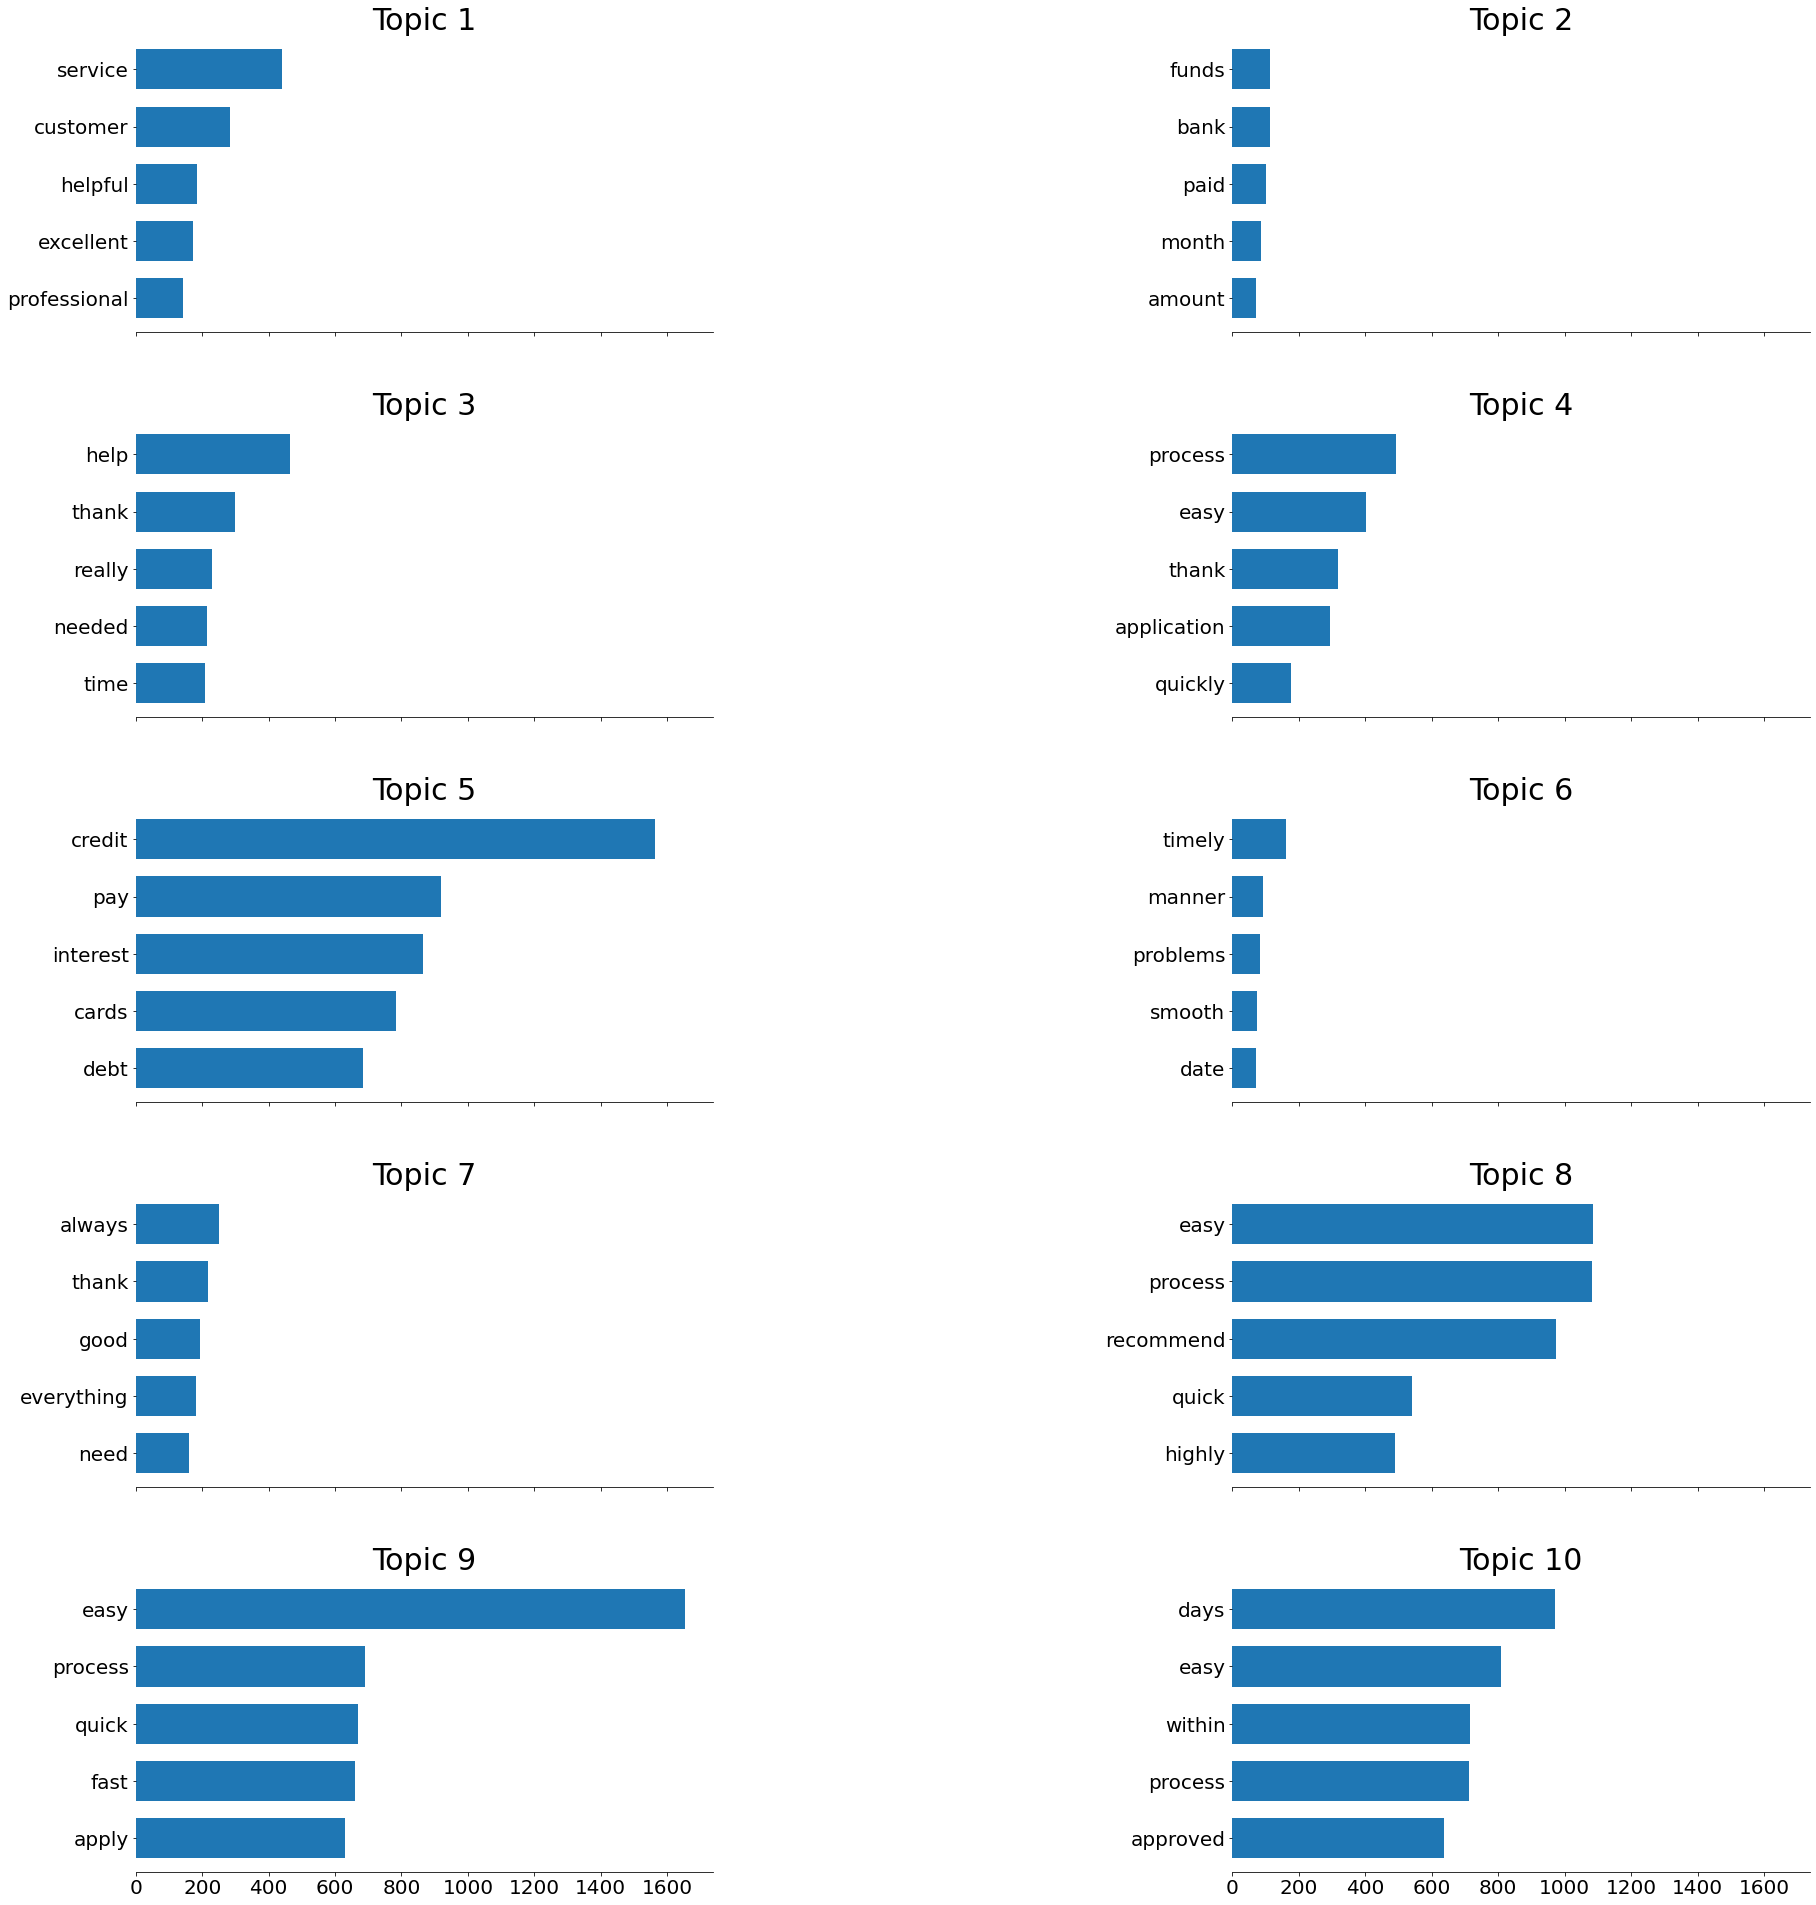

In [185]:
#LDA
lda = LatentDirichletAllocation(n_components=10, learning_decay=0.9)
X_lda = lda.fit(X_cv)

#Plot topics function. Code from: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(5, 2, figsize=(30, 30), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
#Show topics
n_top_words = 5
feature_names = vectorizer_cv.get_feature_names()
plot_top_words(X_lda, feature_names, n_top_words, '')

In [147]:
#pip install fuzzywuzzy

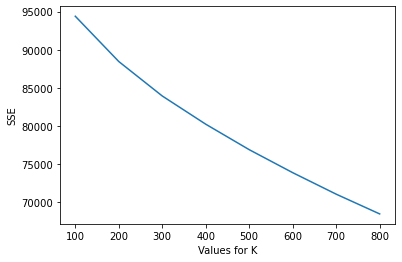

In [148]:
#Test increments of 100 clusters using elbow method
sse={}
for k in np.arange(100,900,100):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_cv)
    sse[k] = kmeans.inertia_
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel('Values for K')
plt.ylabel('SSE')
plt.show();

In [149]:
#Create 200 clusters
kmeans = KMeans(n_clusters=200)
kmeans.fit(X_cv)
result = pd.concat([txt,pd.DataFrame(X_cv.toarray(),columns=vectorizer_cv.get_feature_names())],axis=1)
result['cluster'] = kmeans.predict(X_cv)

In [150]:
result

,1_string_lem,aand,abd,abide,ability,able,aboard,abreast,abs,absolute,...,young,youngster,youthanks,yrs,yup,zerbo,zero,znd,zulu,cluster
0,fast service good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,41
1,totally happy unsure applying help consolidate...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,168
2,quick efficient obtaining speedy manner,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,46
3,easy work secure fast,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,53
4,pleased simple quick process associates contac...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9187,application process simple less hours,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,185
9188,come threw couple times like flexible payments...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,104
9189,easy apply without hurting credit score decide...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,88
9190,letter mail pre approval code pending hassle f...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,141


In [151]:
#Label each cluster with the word(s) that all of its food names have in common
clusters = result['cluster'].unique()
labels = []
for i in range(len(clusters)):
    subset = result[result['cluster'] == clusters[i]]
    words = ' '.join([x for x in np.where(subset.all()!=0,subset.columns,None) if x and x!='Name' and x!='cluster' and len(x.split()) == 1])
    labels.append(words)
labels_table = pd.DataFrame(zip(clusters,labels),columns=['cluster','label'])
result_labelled = pd.merge(result,labels_table,on='cluster',how='left')

In [152]:
result_labelled

,1_string_lem,aand,abd,abide,ability,able,aboard,abreast,abs,absolute,...,youngster,youthanks,yrs,yup,zerbo,zero,znd,zulu,cluster,label
0,fast service good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,41,1_string_lem good
1,totally happy unsure applying help consolidate...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,168,1_string_lem happy
2,quick efficient obtaining speedy manner,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,46,1_string_lem quick
3,easy work secure fast,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,53,1_string_lem easy fast
4,pleased simple quick process associates contac...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,59,1_string_lem process quick
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9187,application process simple less hours,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,185,1_string_lem application
9188,come threw couple times like flexible payments...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,104,1_string_lem
9189,easy apply without hurting credit score decide...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,88,1_string_lem apply
9190,letter mail pre approval code pending hassle f...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,141,1_string_lem


In [153]:
#Visualise sizes of supermarket categories (manually added to result_labelled) and clean clusters
#result_summary = pd.pivot_table(result_labelled,index=['label','category'],values=['easy'],aggfunc='count').reset_index().rename(columns={'Name':'count'})
#result_treemap = result_summary[(result_summary['label'] != '') & (result_summary['count'] > 1)]
#fig = px.treemap(result_treemap,path=['category','label'],values='count')
#fig.show();

In [154]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [155]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(df['1_string_lem'].values)
features = vec.transform(df['1_string_lem'].values)

In [156]:
cls = MiniBatchKMeans(n_clusters=5, random_state=0)
cls.fit(features)

MiniBatchKMeans(n_clusters=5, random_state=0)

In [157]:
# predict cluster labels for new dataset
cls.predict(features)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_

array([0, 4, 3, ..., 3, 3, 2], dtype=int32)

In [158]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

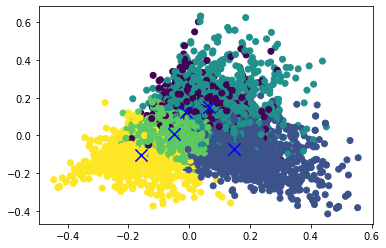

In [159]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [160]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls.predict(features))

0.008729147983490018

In [161]:
txt = df['1_string_lem']
funckmean(txt)

Top terms per cluster:
Cluster 0:
 credit
 thank
 pay
 easy
 help
 debt
Cluster 1:
 service
 customer
 great
 excellent
 fast
 easy
Cluster 2:
 easy
 quick
 process
 application
 apply
 recommend
Cluster 3:
 days
 easy
 process
 approved
 couple
 funds
Cluster 4:
 fast
 easy
 process
 recommend
 great
 application


In [162]:
def funckmean(txt):
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(txt)
    true_k = 5
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000, n_init=1)
    model.fit(X)

    print("Top terms per cluster:")
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    for i in range(true_k):
        print("Cluster %d:" % i),
        for ind in order_centroids[i, :6]:
            print(' %s' % terms[ind]),
        print

In [163]:
dfpro2=pd.read_csv('Desktop/Data/EXL intern/dfpro2.csv')
dfservice2=pd.read_csv('Desktop/Data/EXL intern/dfservice2.csv')
dfrates2=pd.read_csv('Desktop/Data/EXL intern/dfrates2.csv')
dfexp2=pd.read_csv('Desktop/Data/EXL intern/dfexp2.csv')

In [164]:
#txt=dfpro2['string']

In [186]:
def func(txt):#Bag of words
    vectorizer_cv = CountVectorizer(analyzer='word')
    X_cv = vectorizer_cv.fit_transform(txt)
    matrix=pd.concat([txt,pd.DataFrame(X_cv.toarray(), columns=vectorizer_cv.get_feature_names())], axis=1)
    #TF-IDF (word level)
    vectorizer_wtf = TfidfVectorizer(analyzer='word')
    X_wtf = vectorizer_wtf.fit_transform(txt)
    #TF-IDF (n-gram level)
    vectorizer_ntf = TfidfVectorizer(analyzer='word',ngram_range=(1,2))
    X_ntf = vectorizer_ntf.fit_transform(txt)
    #LDA
    lda = LatentDirichletAllocation(n_components=10, learning_decay=0.9)
    X_lda = lda.fit(X_cv)

    #Plot topics function. Code from: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
    def plot_top_words(model, feature_names, n_top_words, title):
        fig, axes = plt.subplots(5, 2, figsize=(30, 30), sharex=True)
        axes = axes.flatten()
        for topic_idx, topic in enumerate(model.components_):
            top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
            top_features = [feature_names[i] for i in top_features_ind]
            weights = topic[top_features_ind]

            ax = axes[topic_idx]
            ax.barh(top_features, weights, height=0.7)
            ax.set_title(f'Topic {topic_idx +1}',
                         fontdict={'fontsize': 30})
            ax.invert_yaxis()
            ax.tick_params(axis='both', which='major', labelsize=20)
            for i in 'top right left'.split():
                ax.spines[i].set_visible(False)
            fig.suptitle(title, fontsize=40)
        plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
        plt.show()

    #Show topics
    n_top_words = 5
    feature_names = vectorizer_cv.get_feature_names()
    plot_top_words(X_lda, feature_names, n_top_words, '')

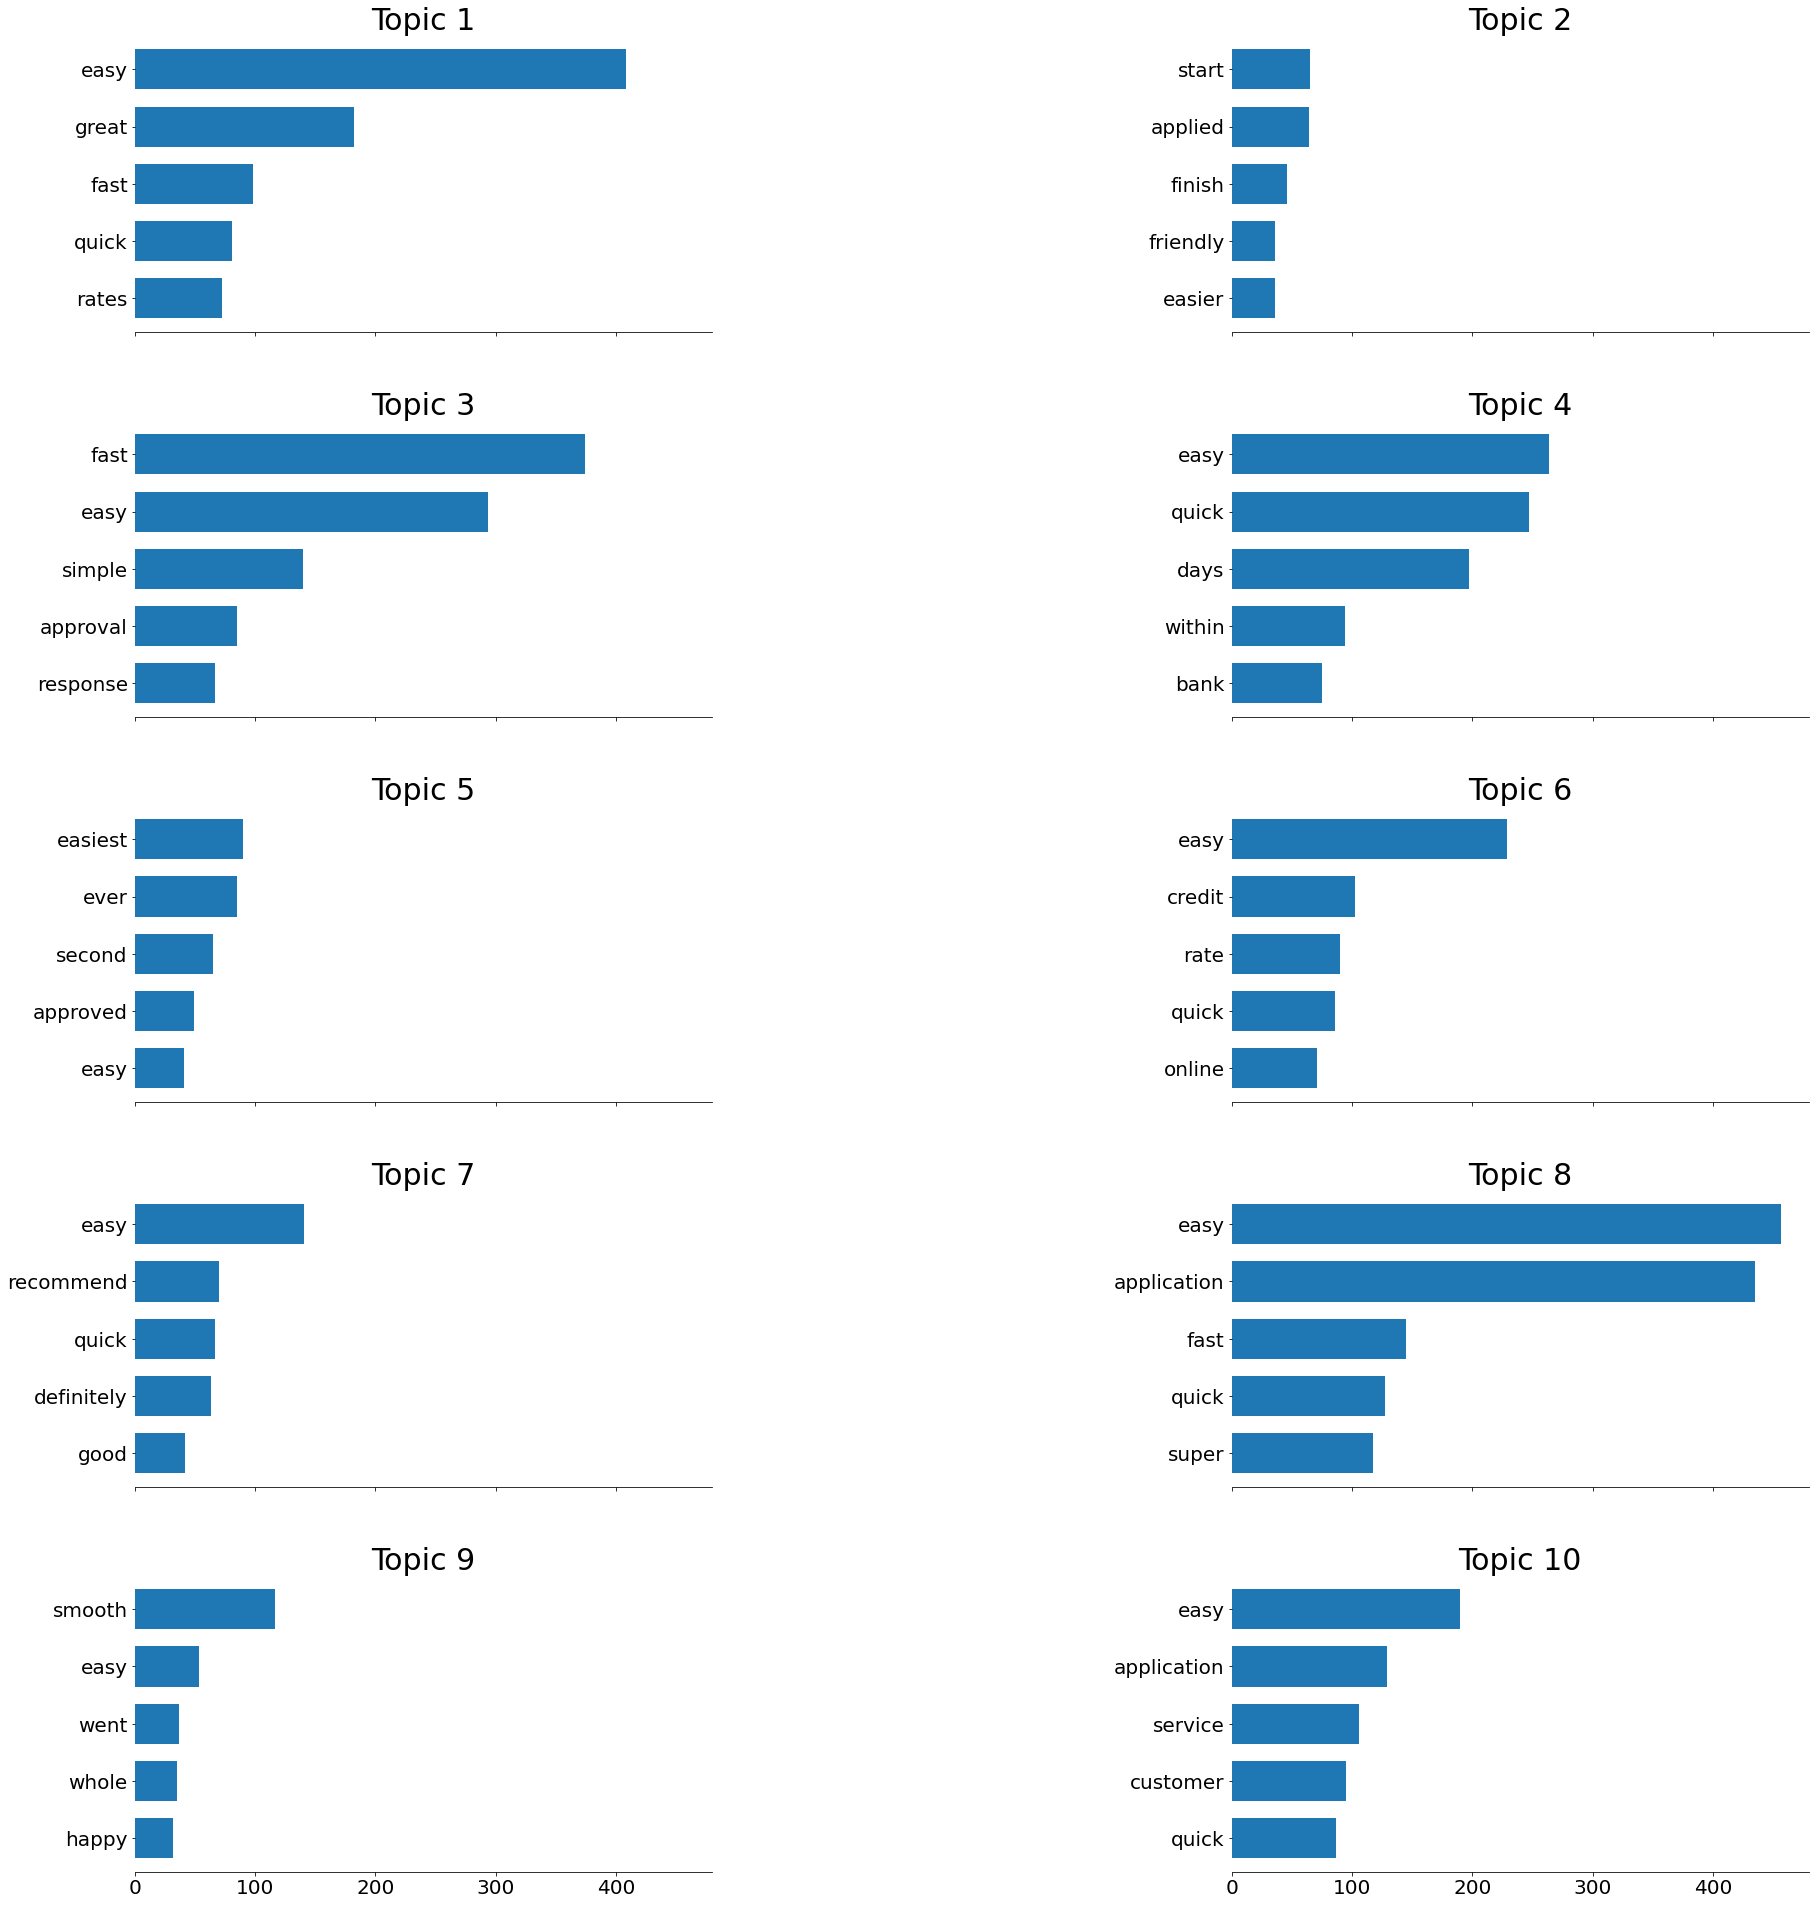

In [187]:
func(dfpro2['string'])

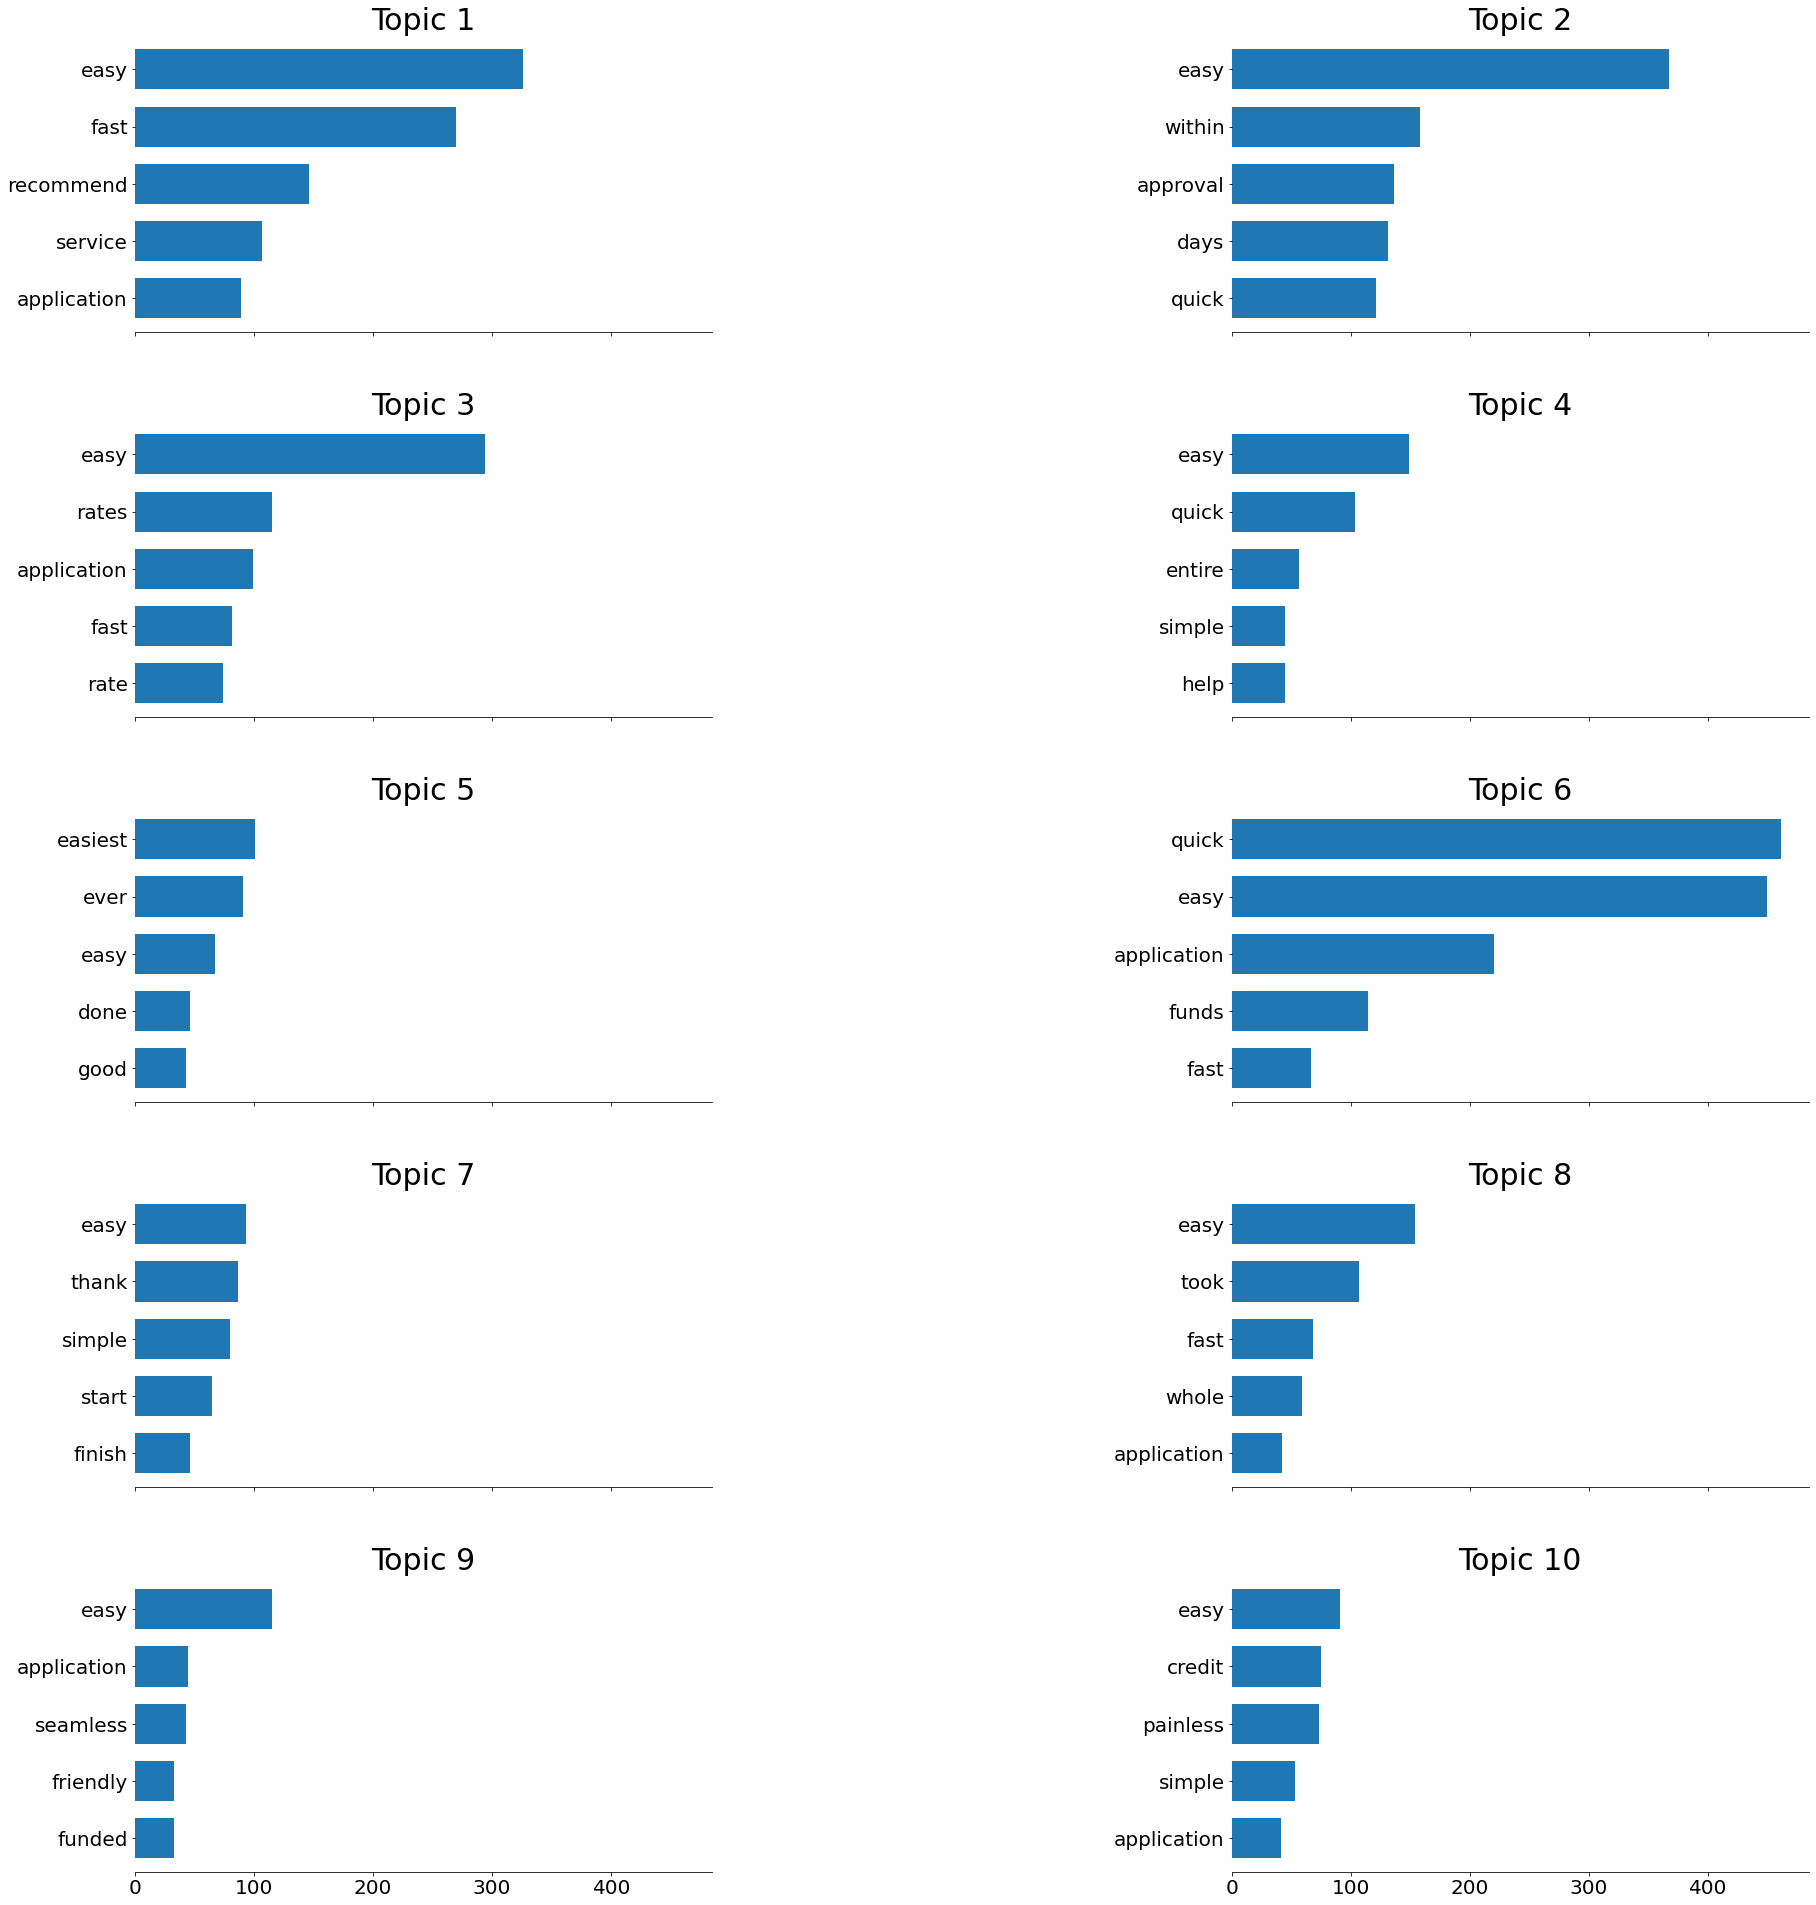

In [188]:
#func(dfpro2['string'])

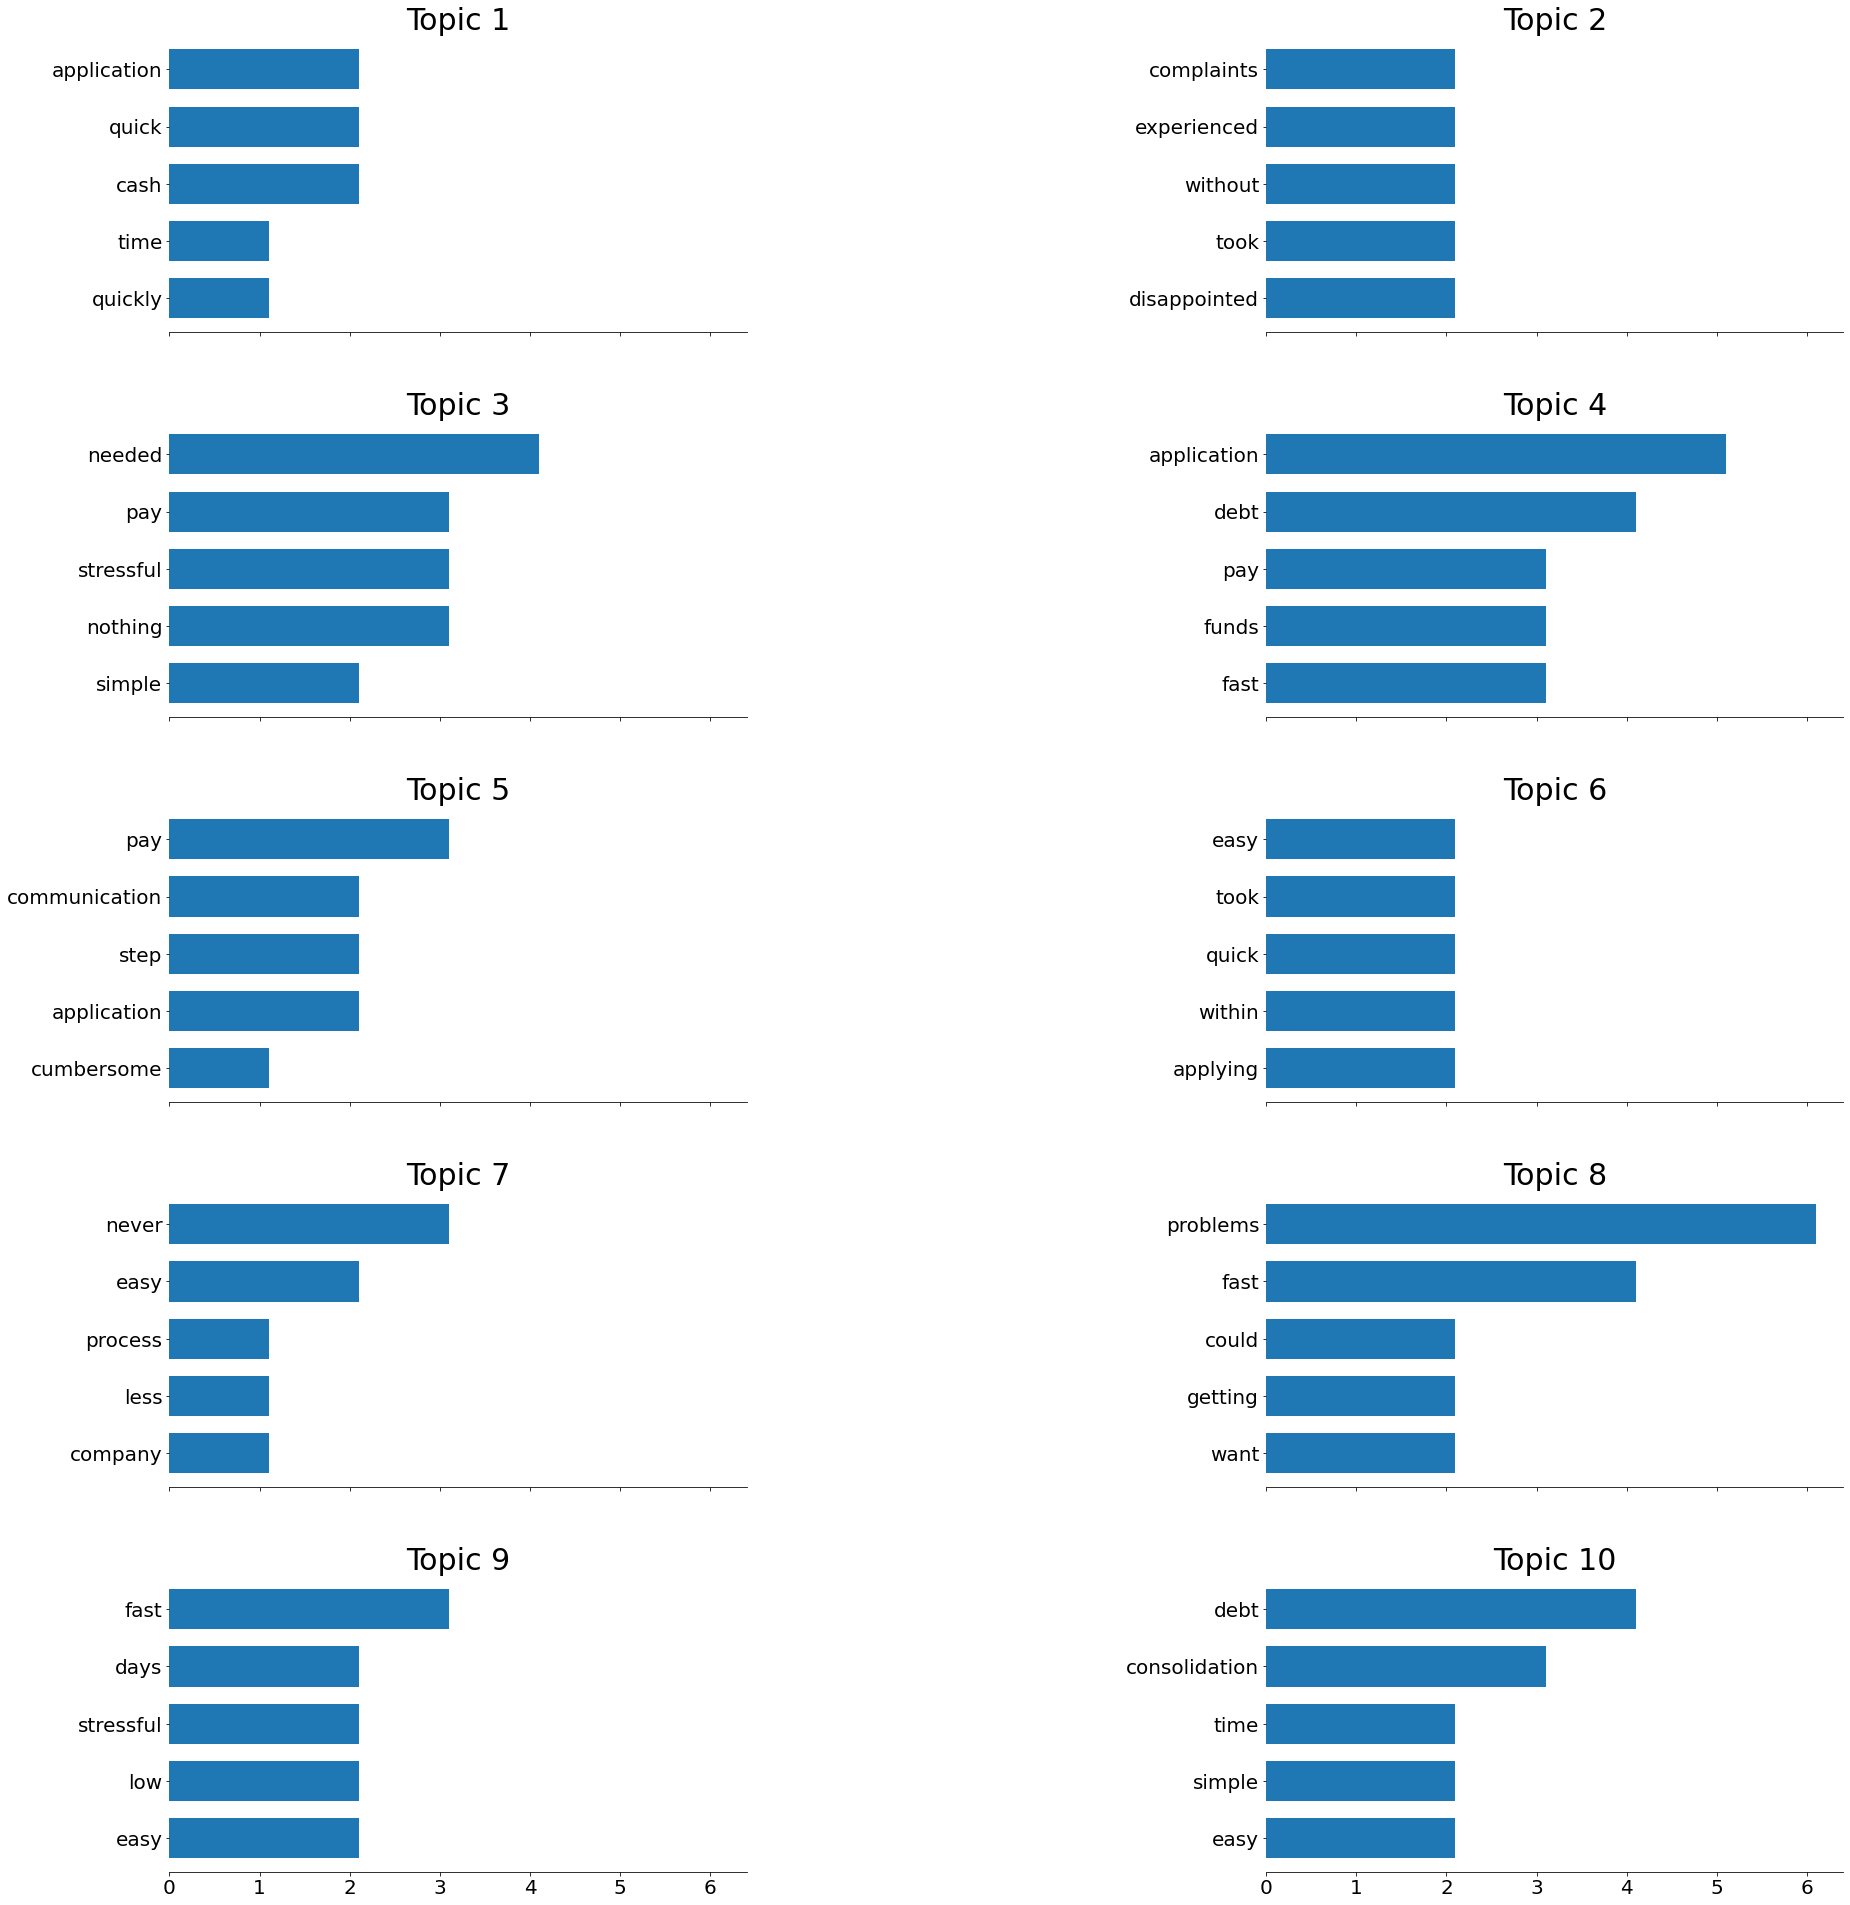

In [189]:
func(dfpro2[dfpro2['sentiment']=='negative']['string'])

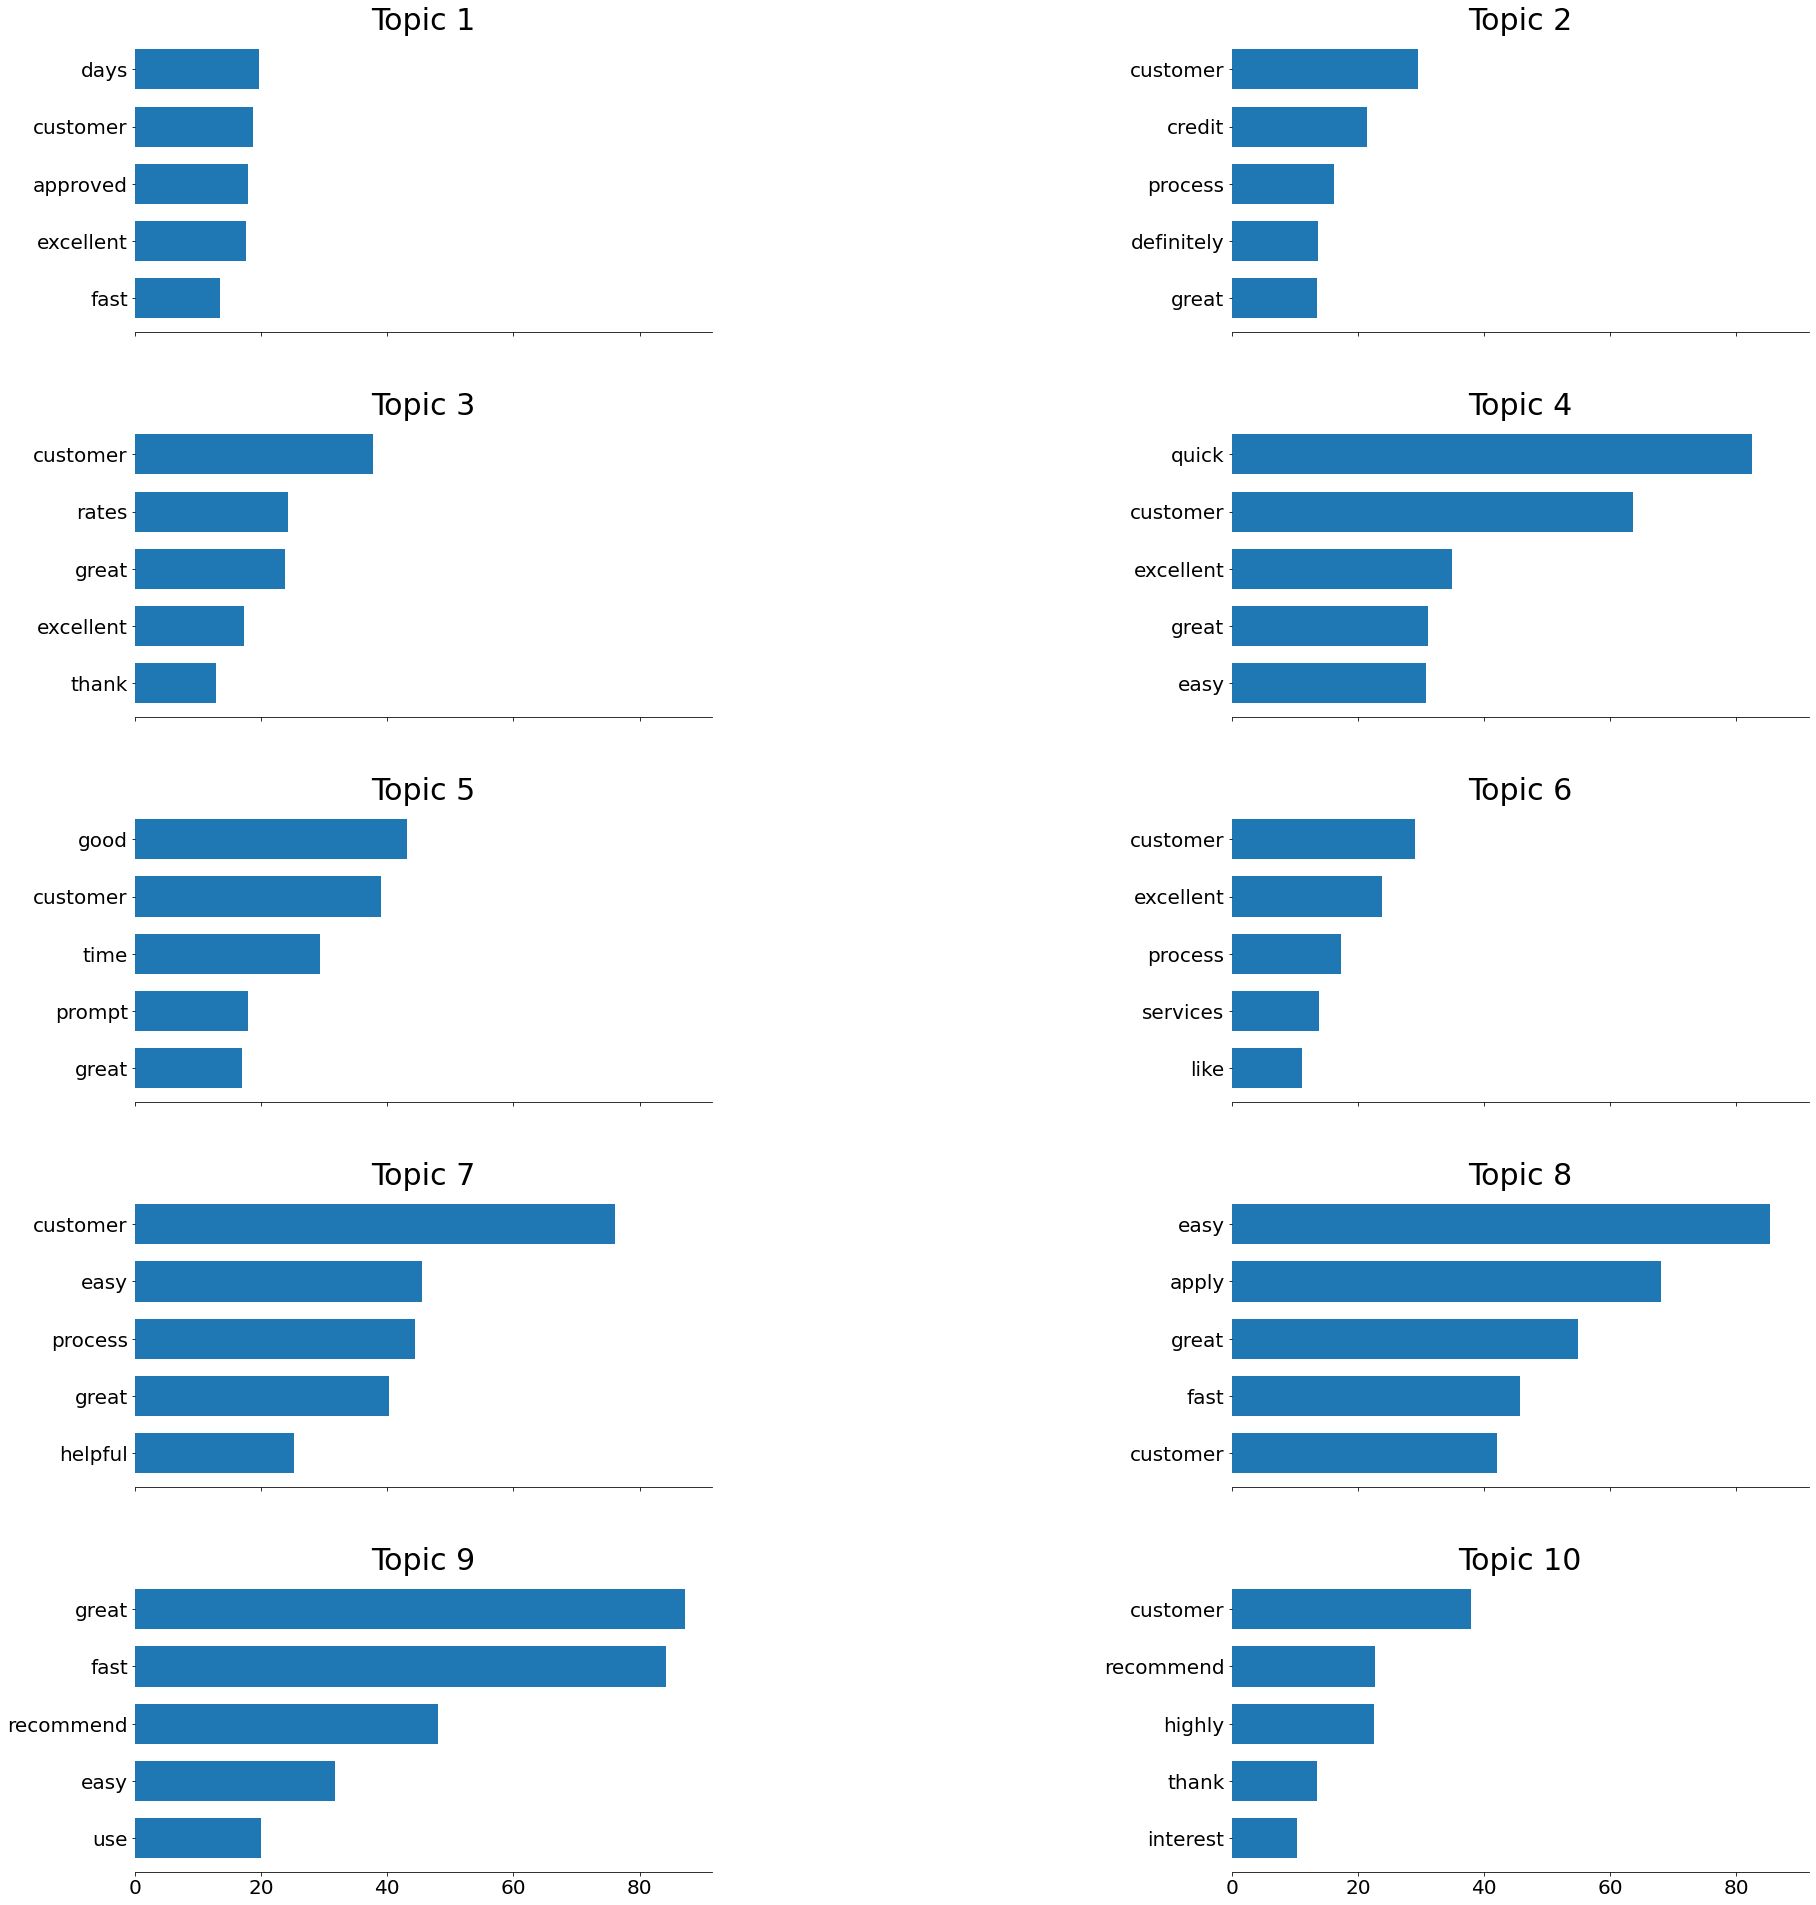

In [190]:
func(dfservice2['string'])

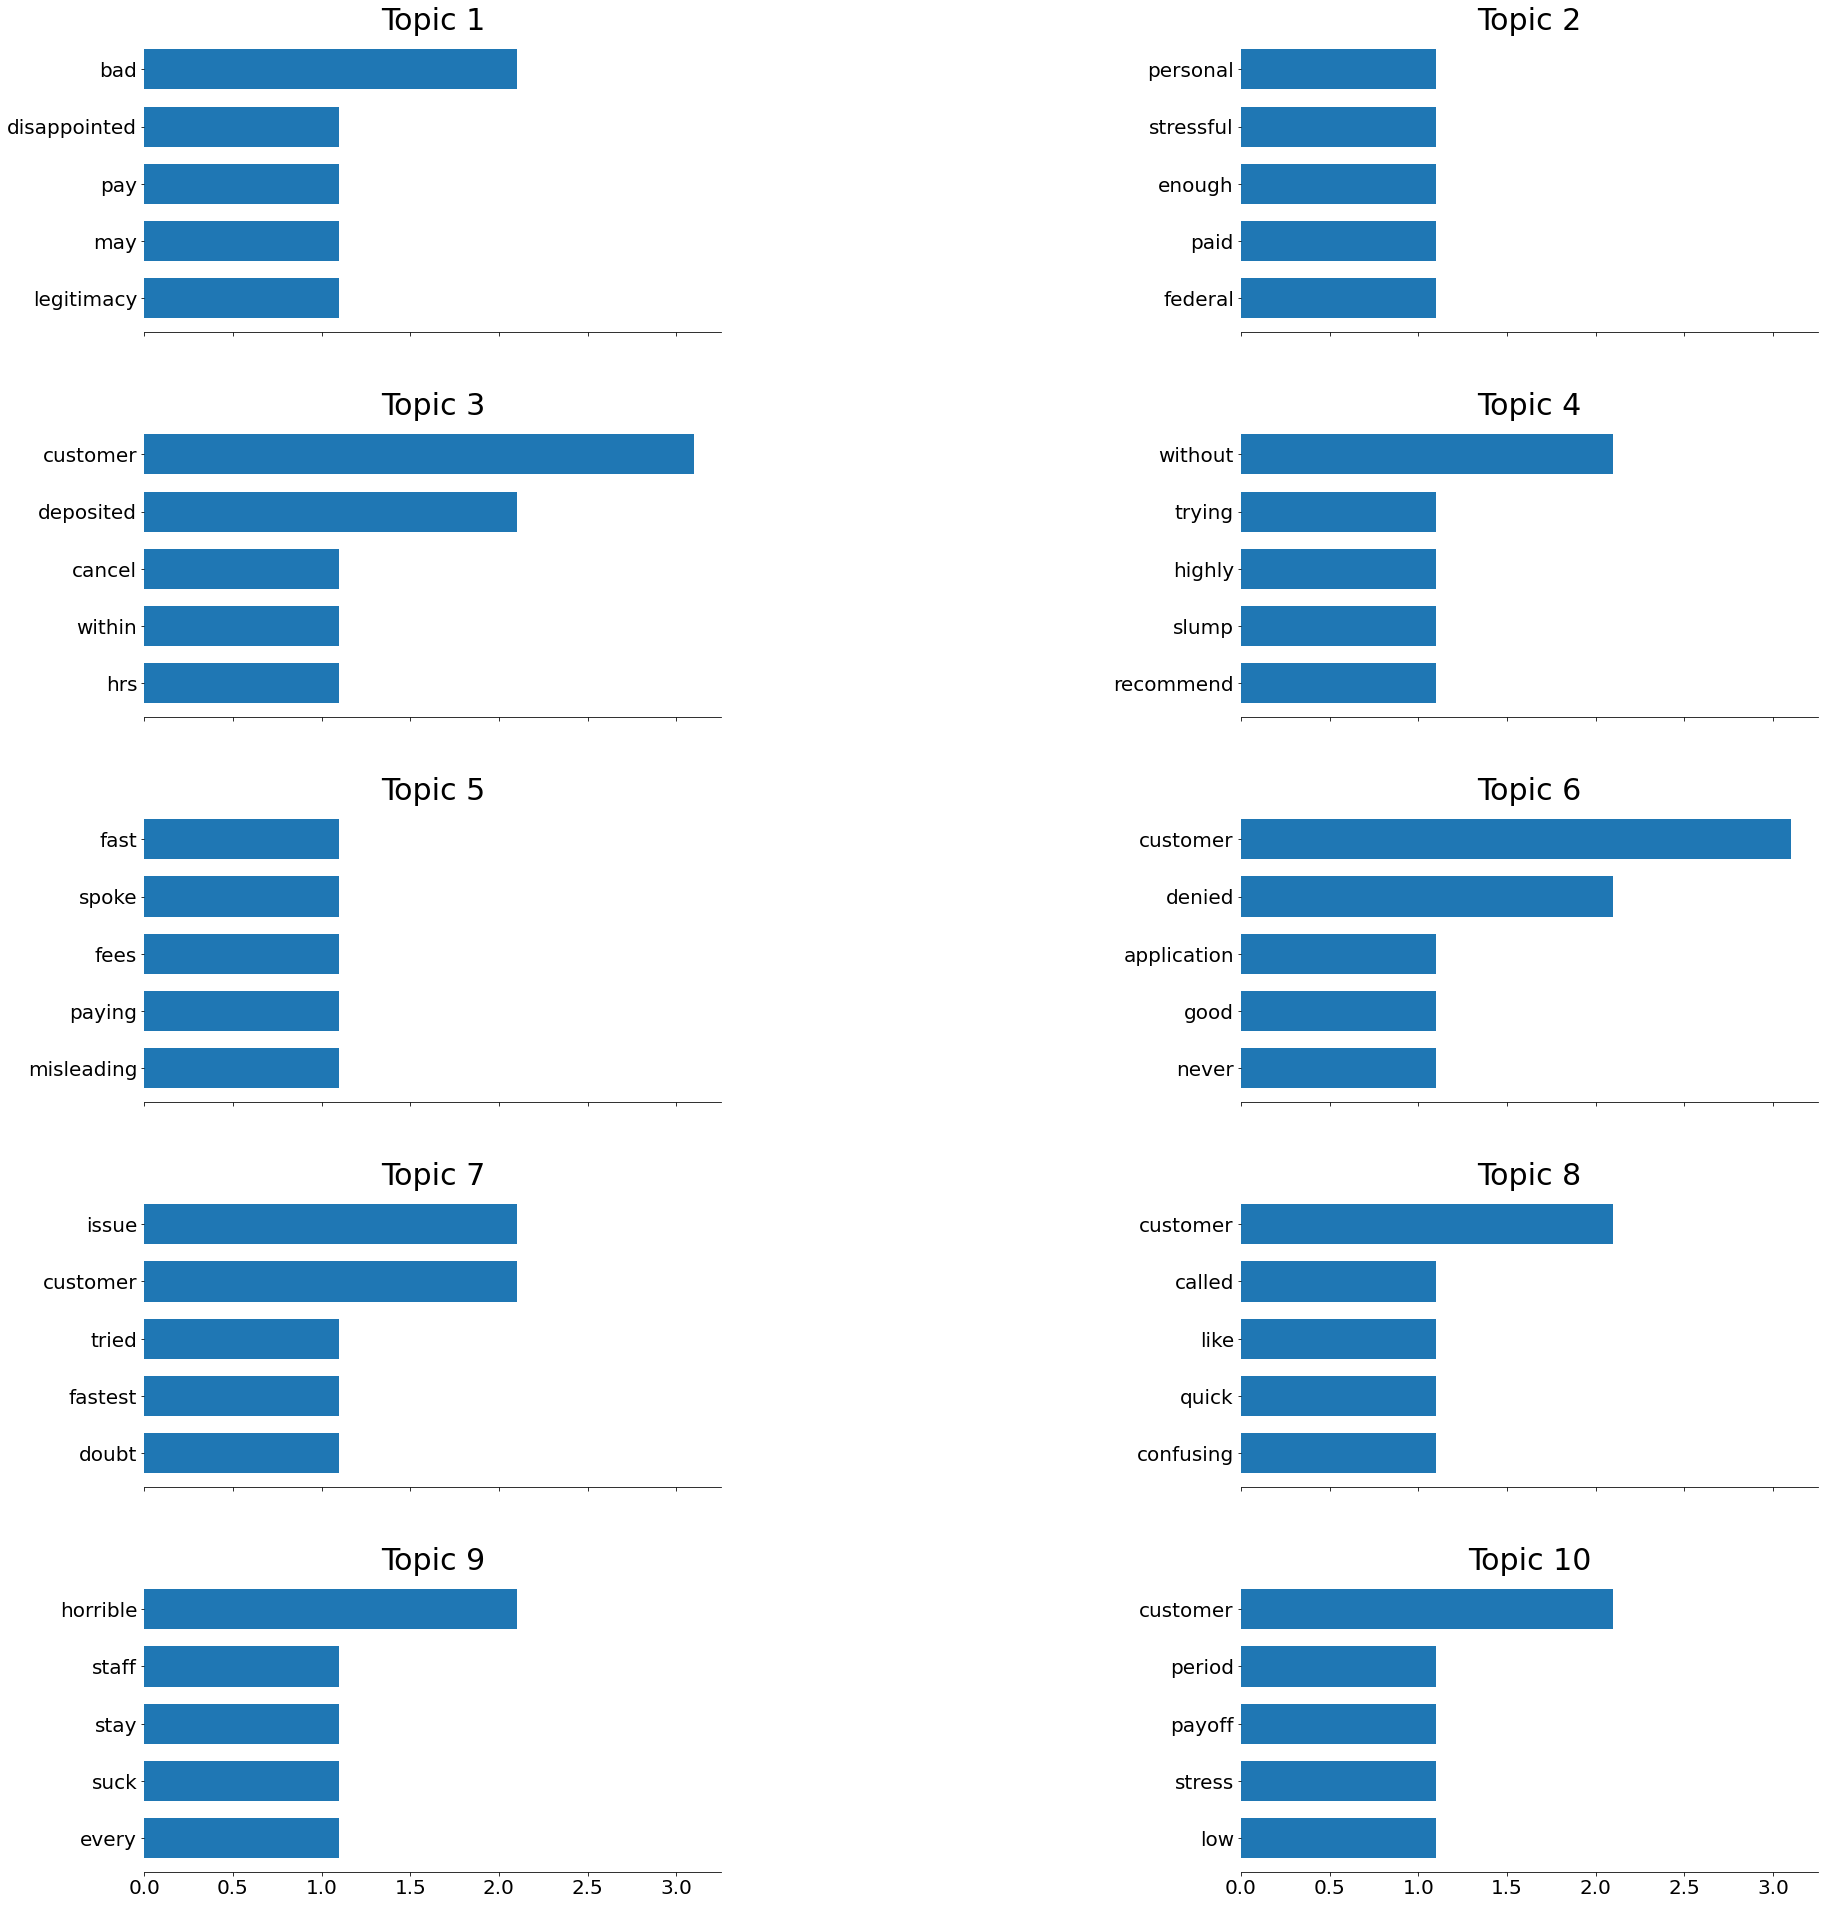

In [191]:
func(dfservice2[dfservice2['sentiment']=='negative']['string'])

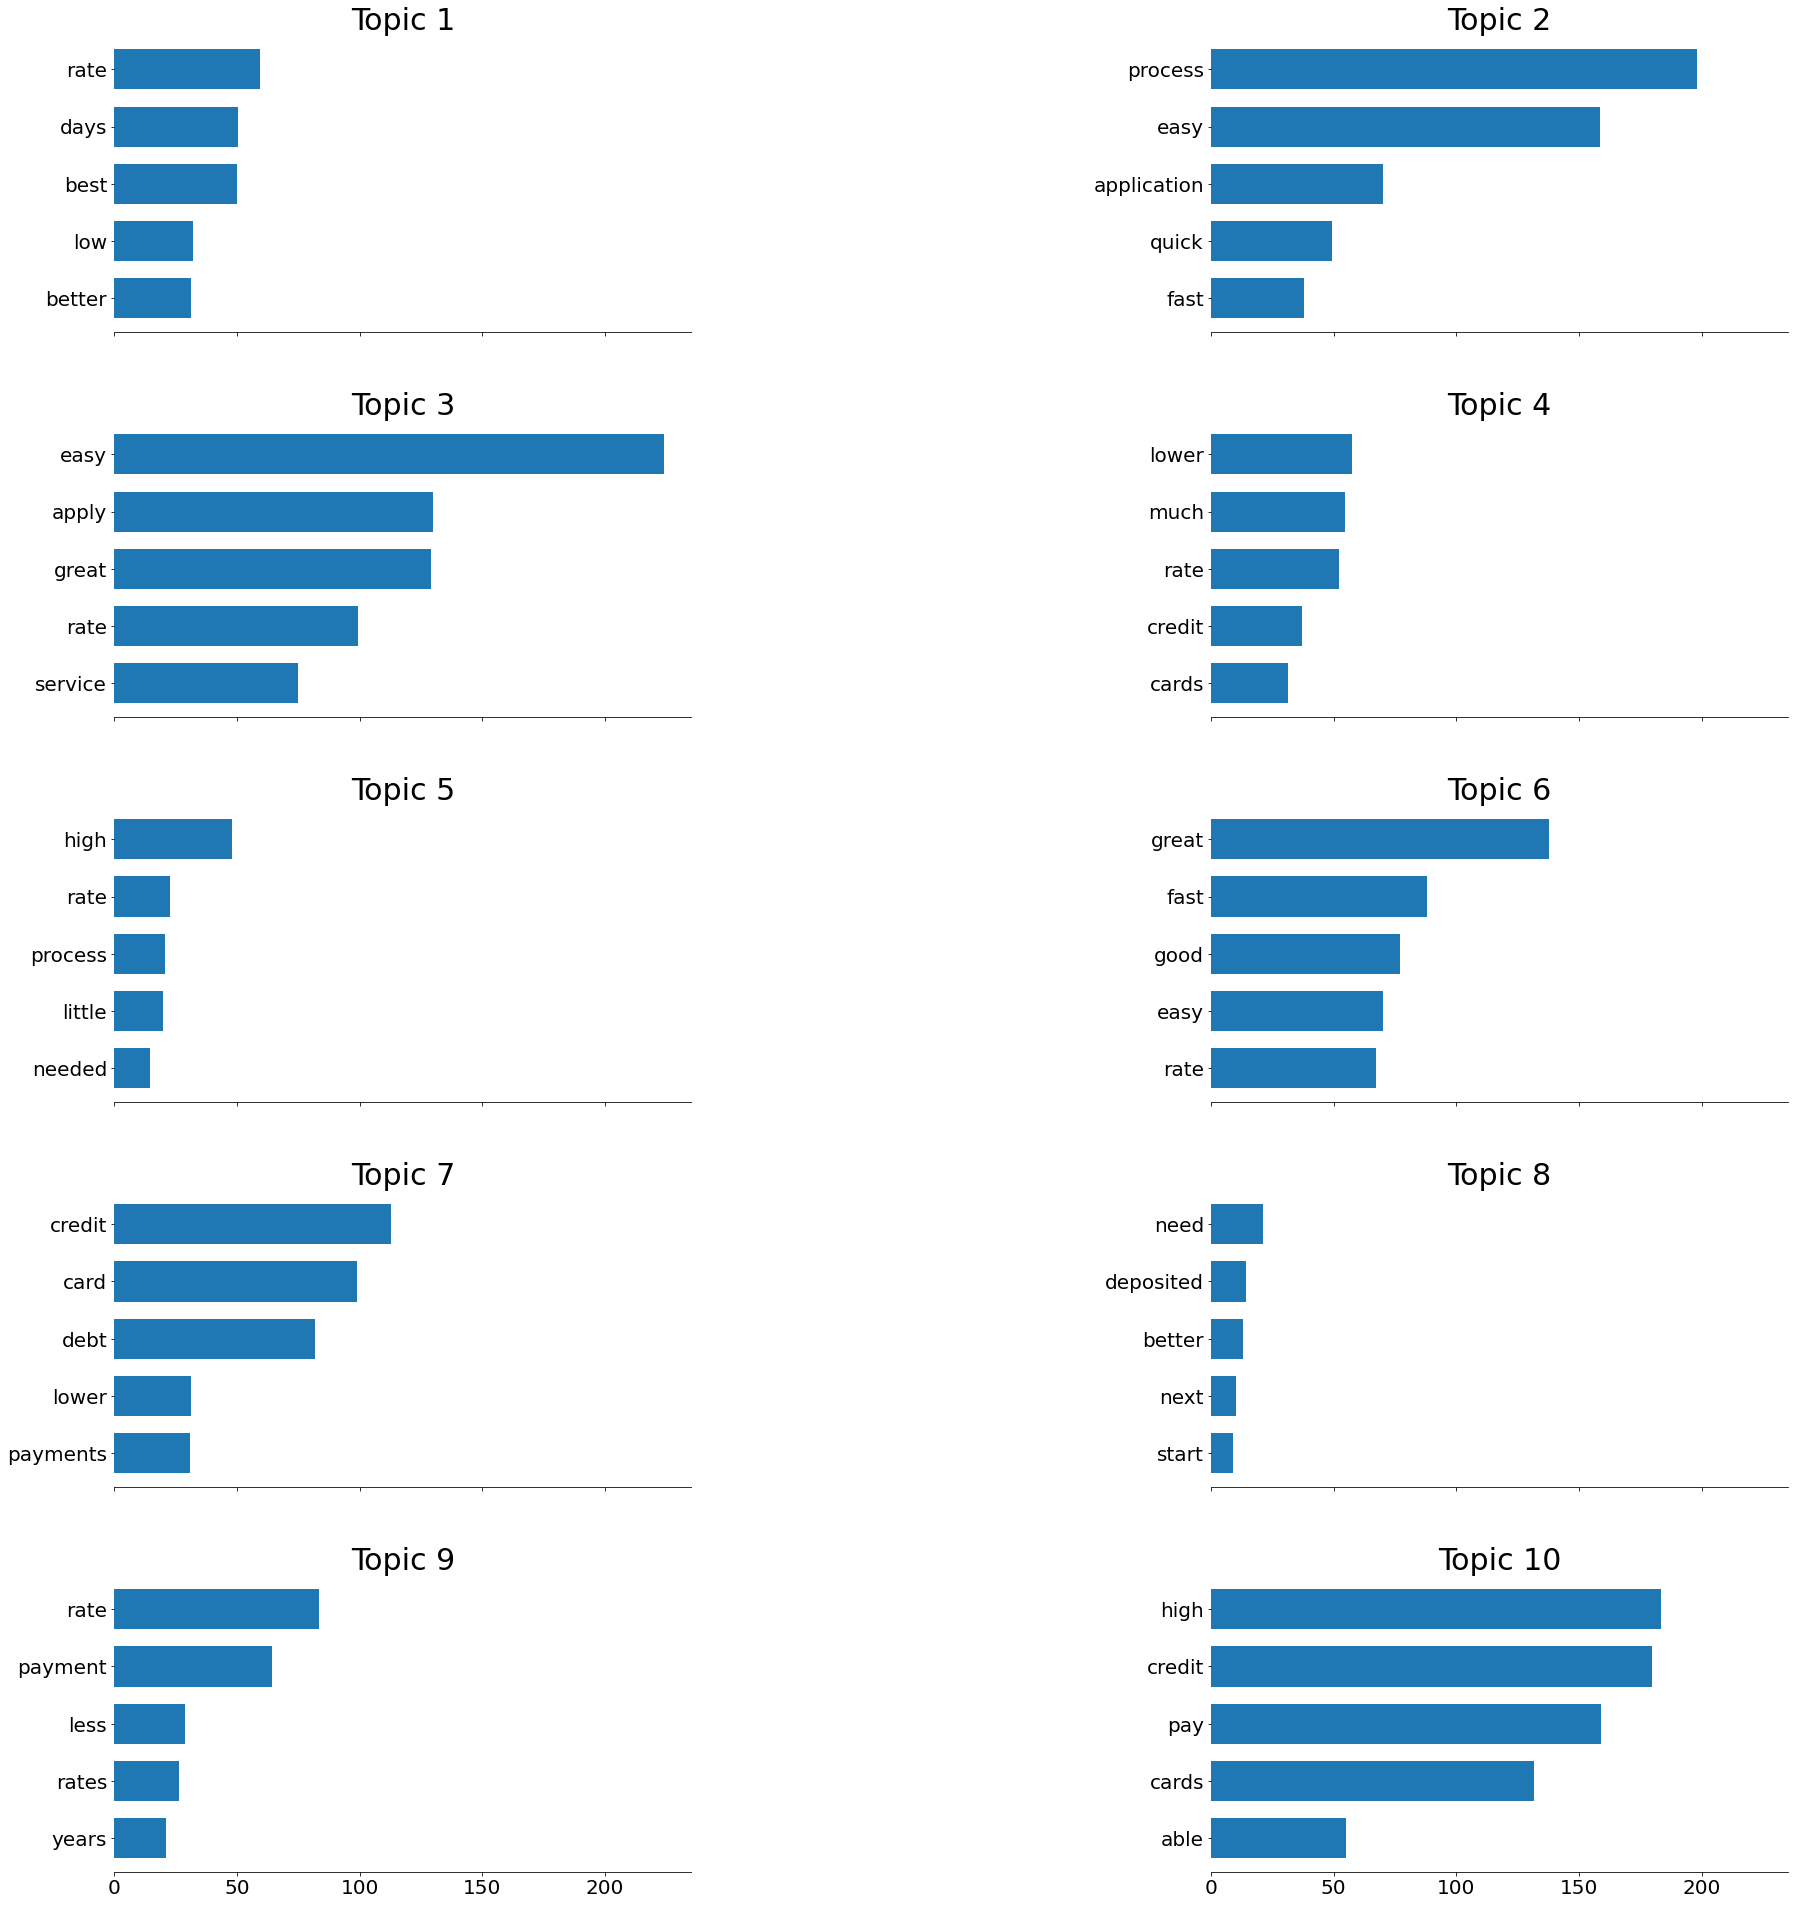

In [192]:
func(dfrates2['string'])

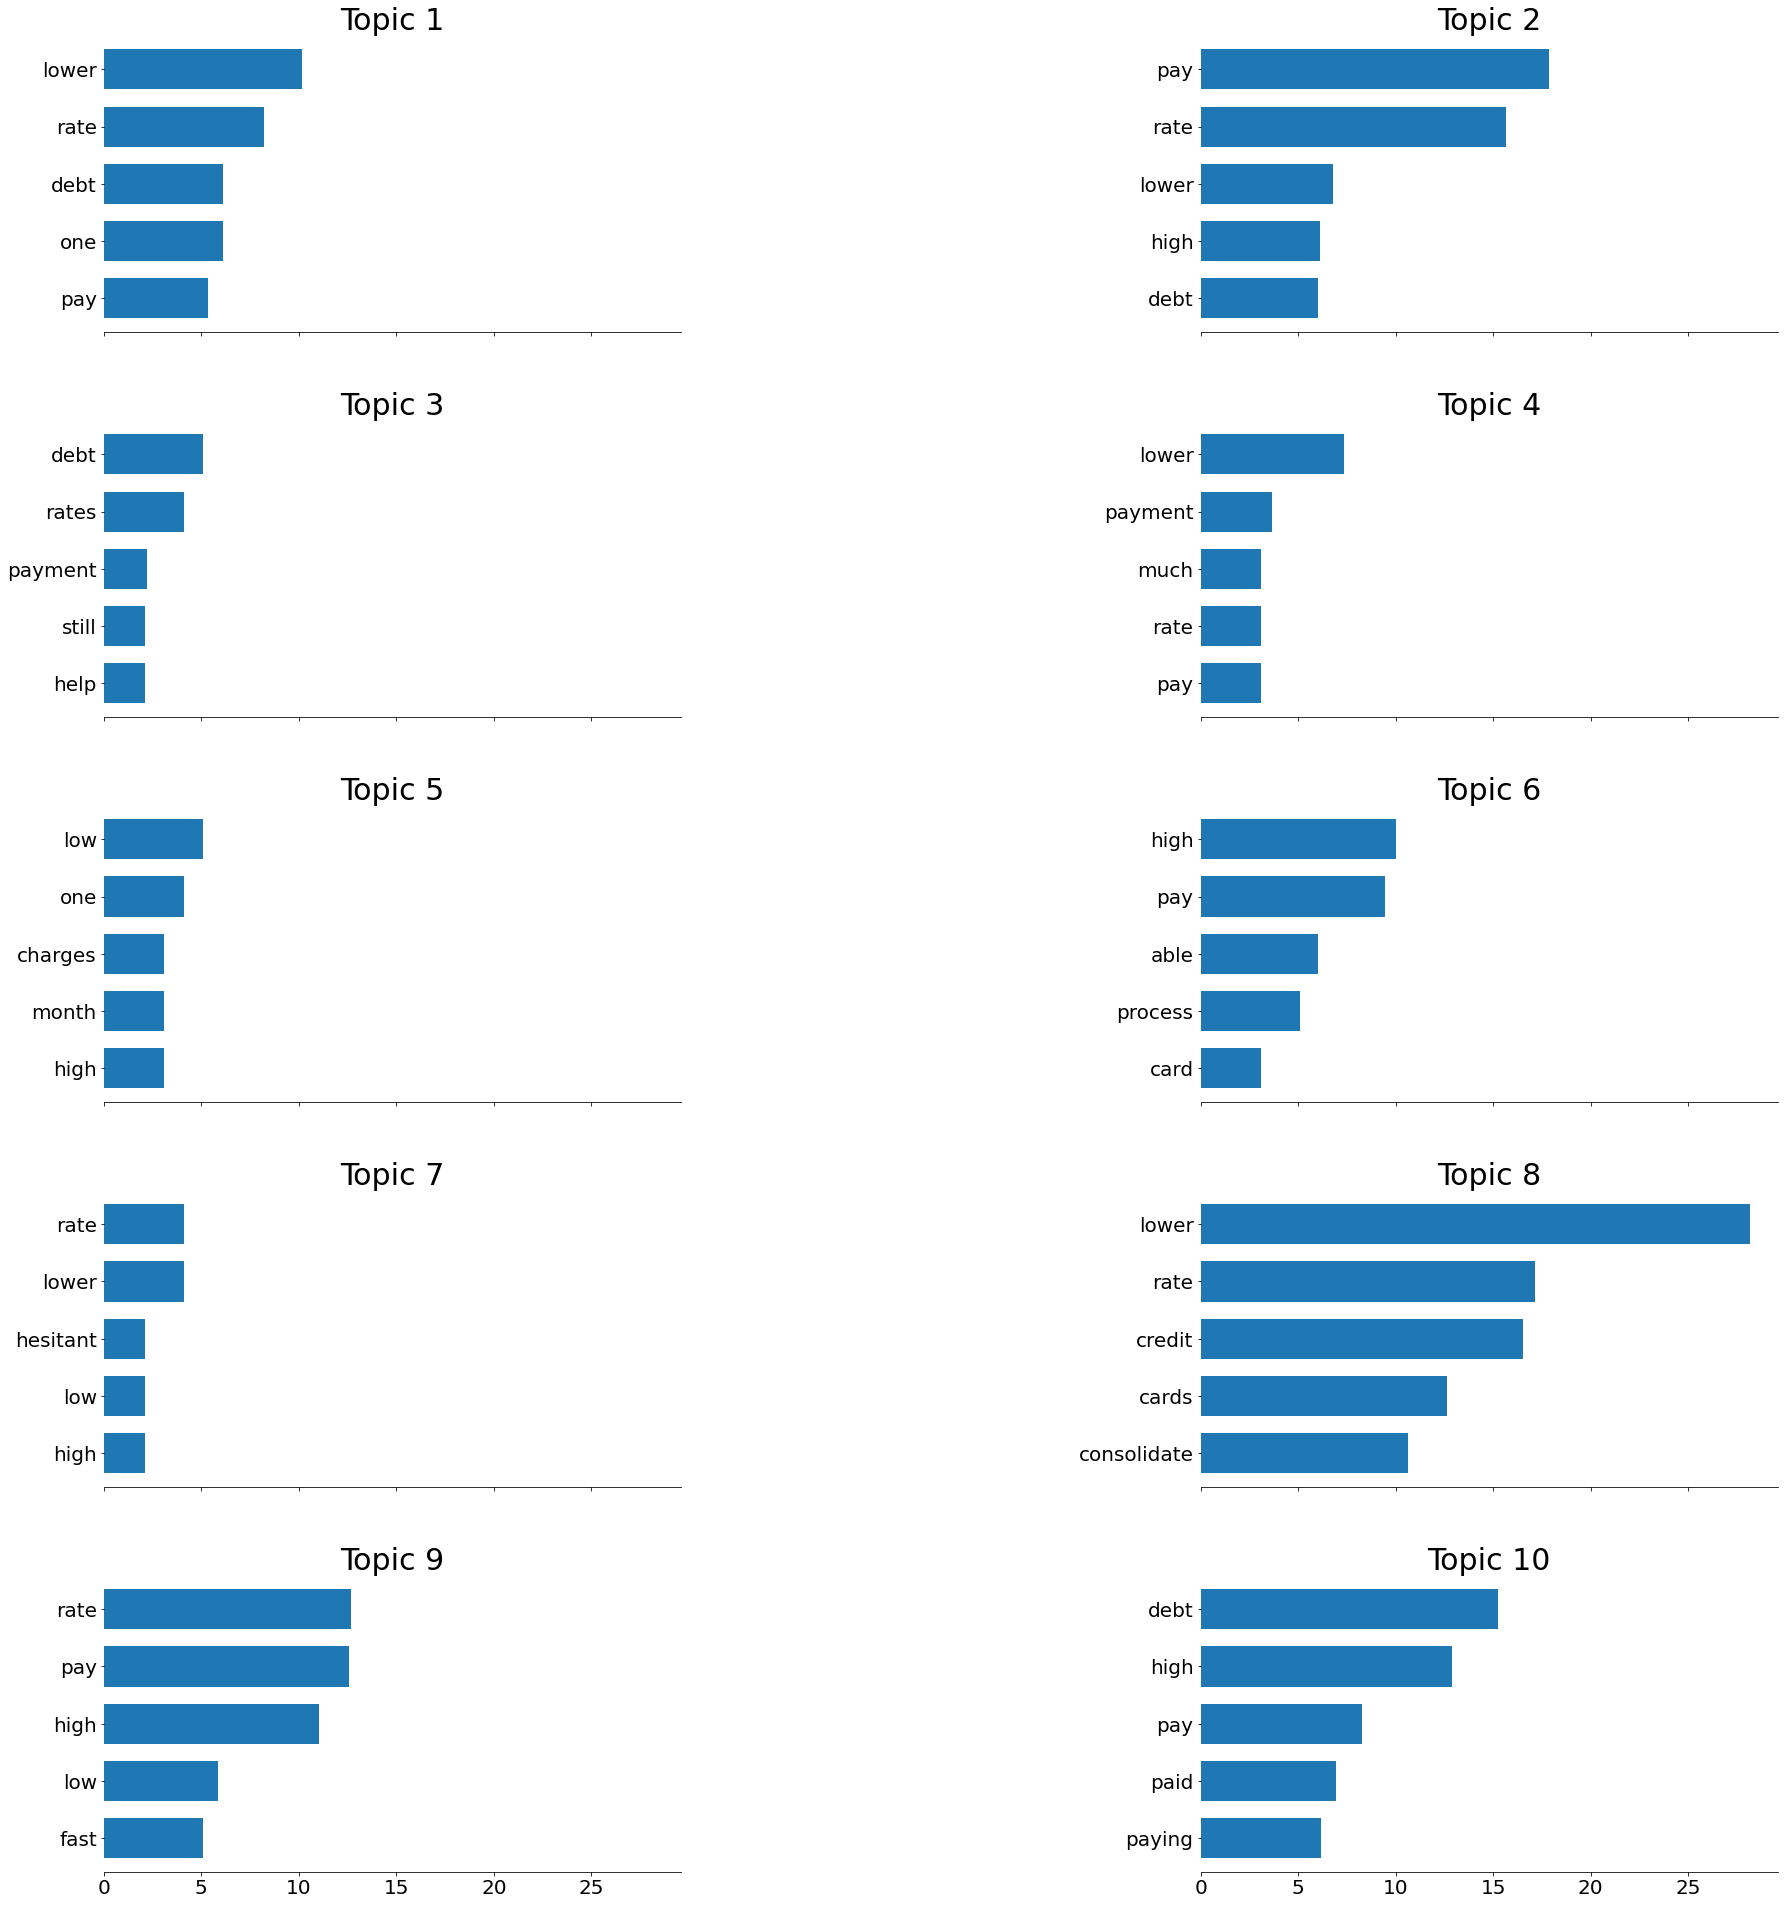

In [193]:
func(dfrates2[dfrates2['sentiment']=='negative']['string'])

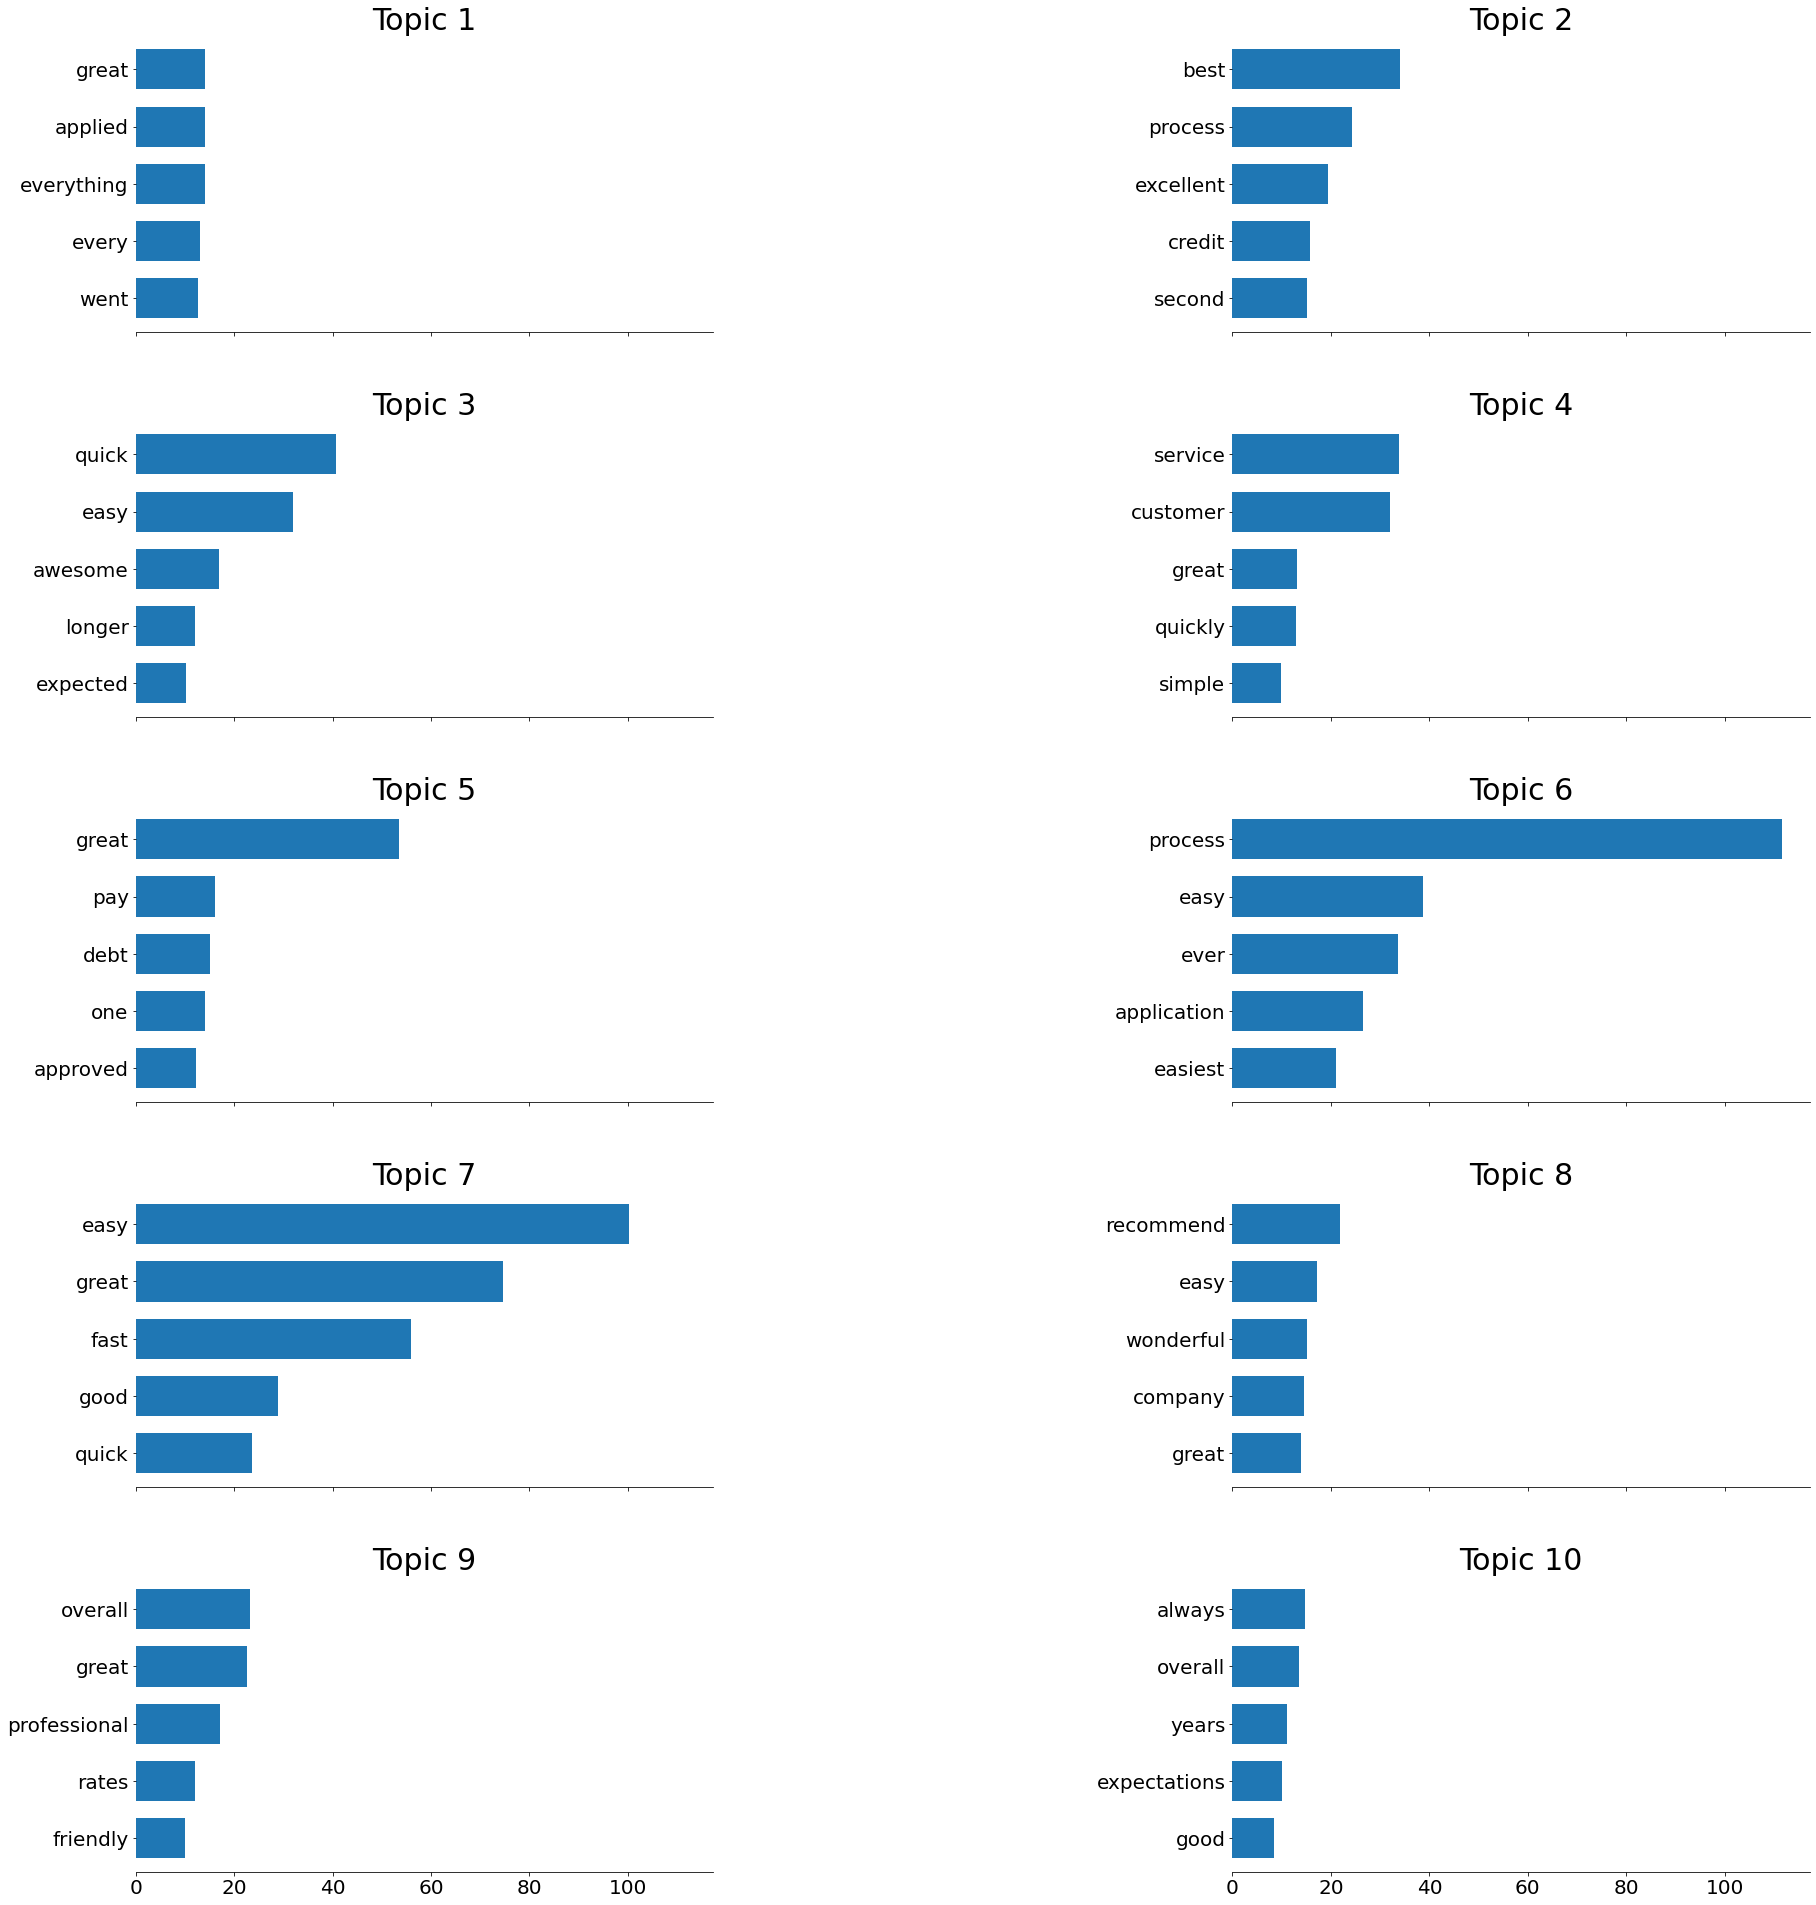

In [194]:
func(dfexp2['string'])

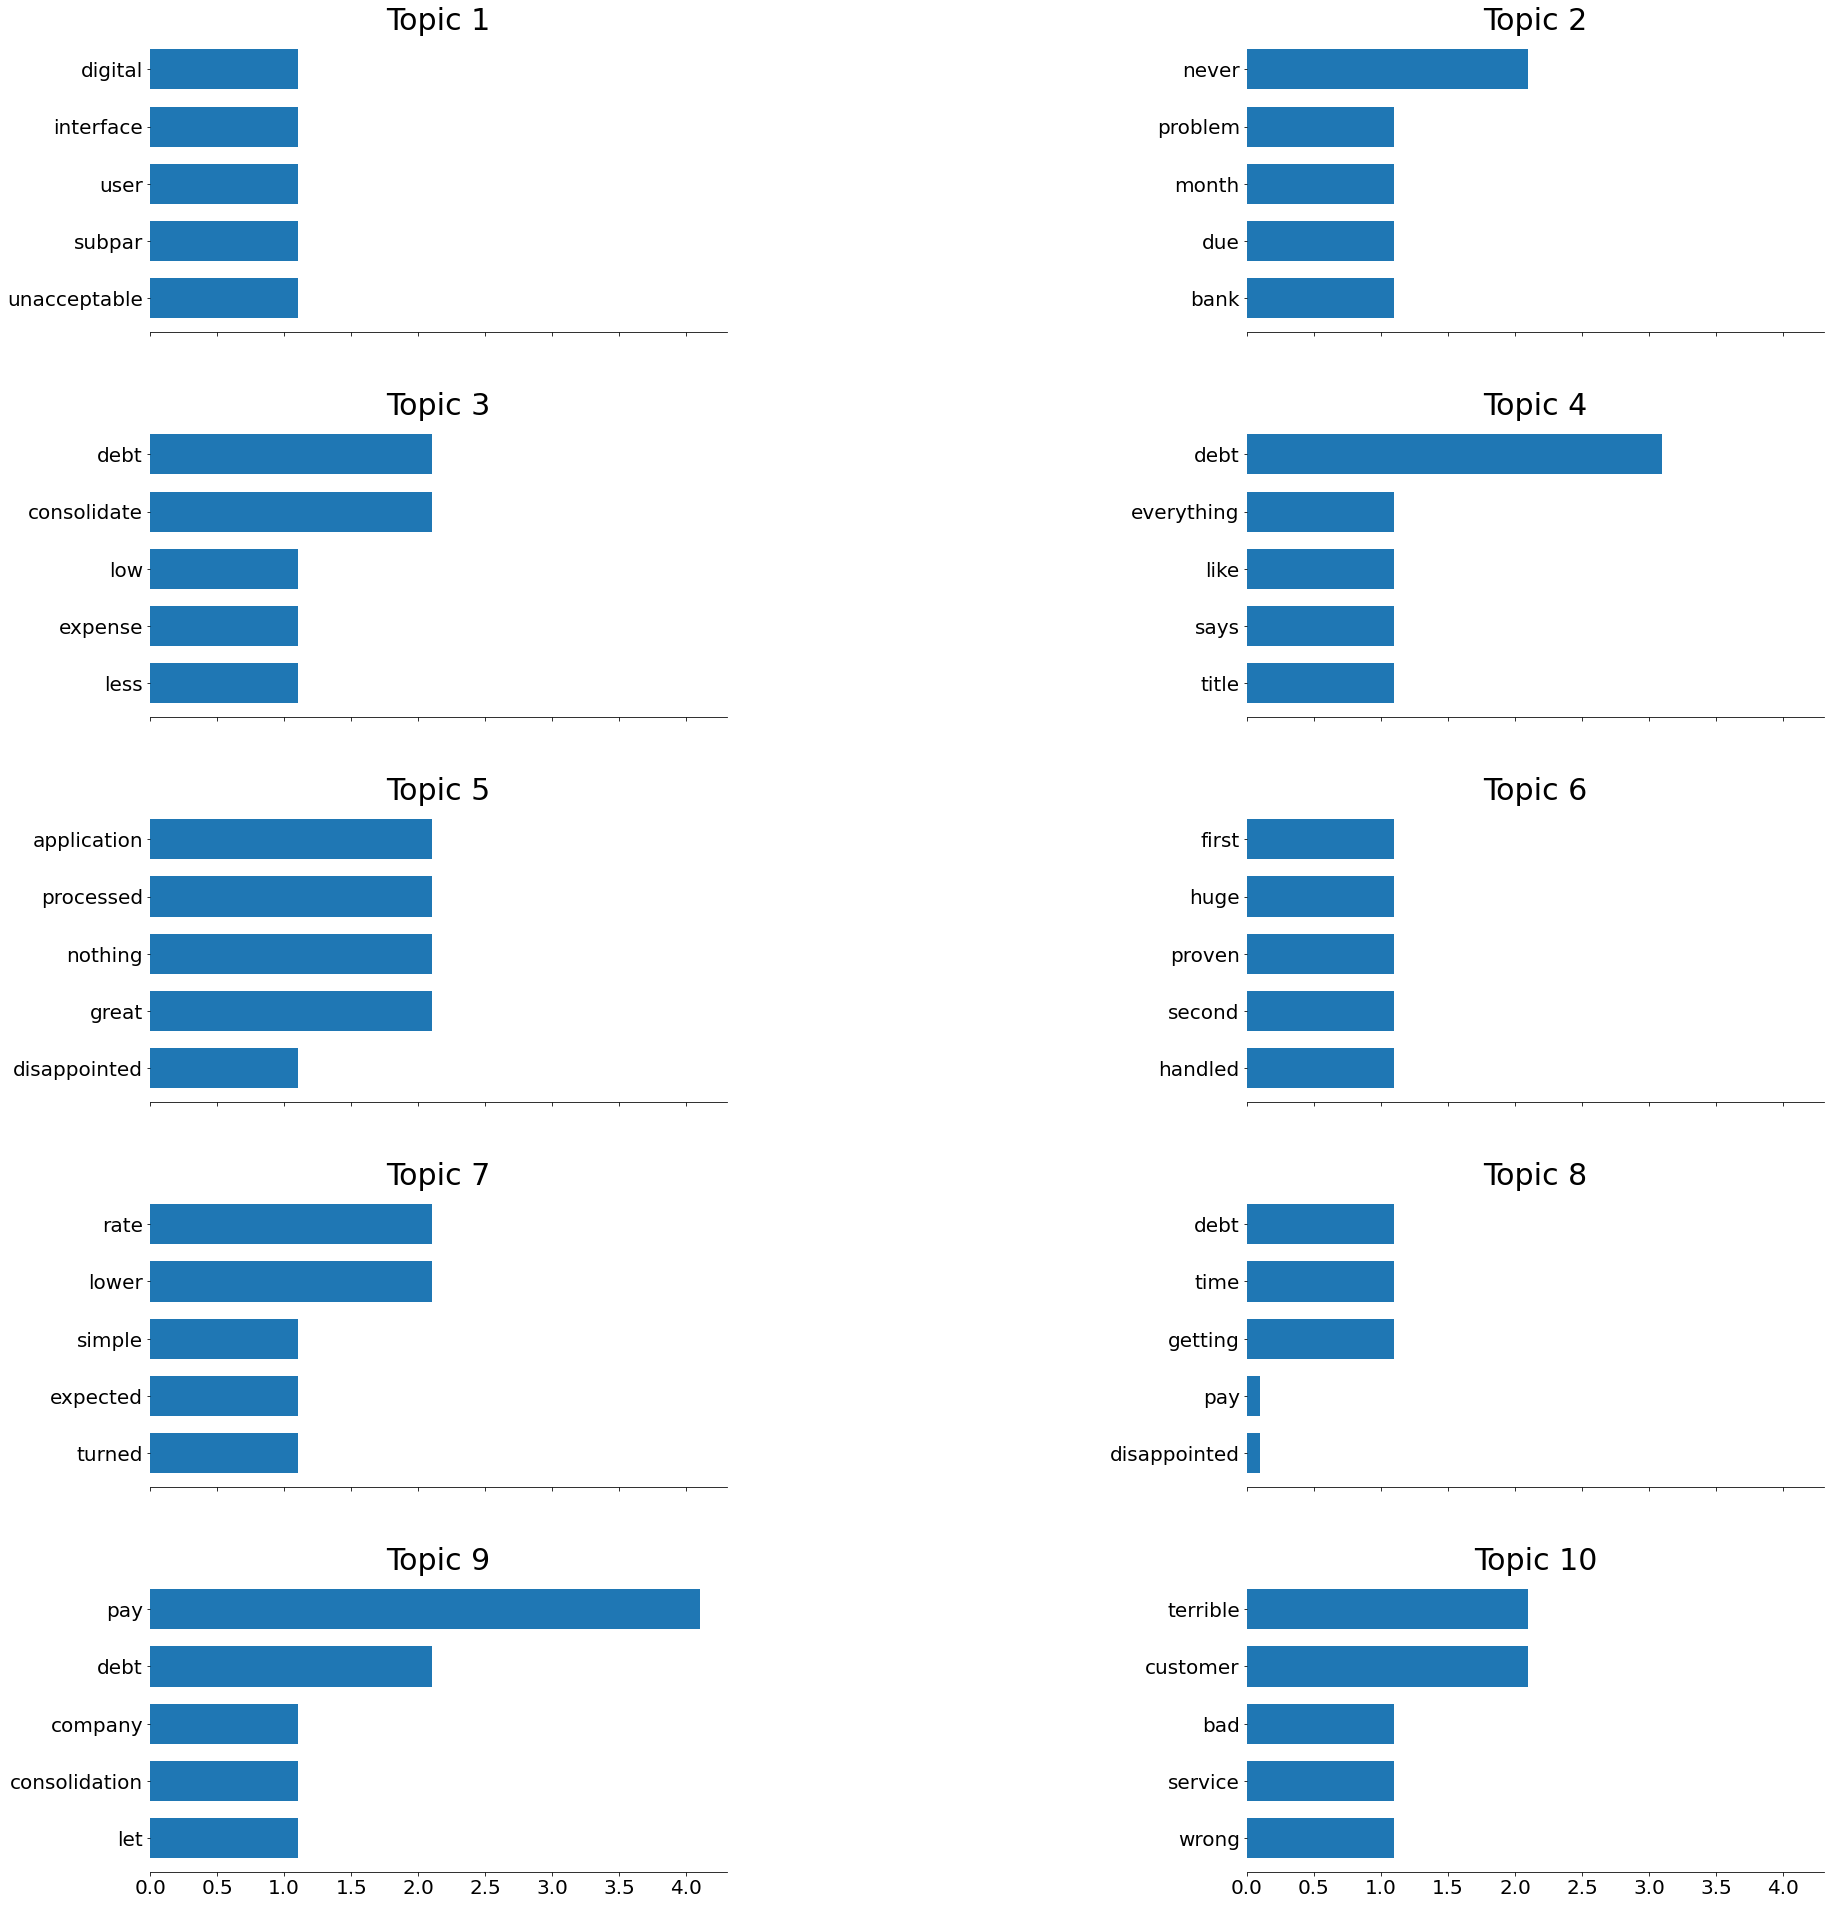

In [195]:
func(dfexp2[dfexp2['sentiment']=='negative']['string'])

In [196]:
funckmean(dfpro2['string'])

Top terms per cluster:
Cluster 0:
 smooth
 easy
 application
 fast
 quick
 recommend
Cluster 1:
 fast
 easy
 application
 approval
 great
 simple
Cluster 2:
 quick
 easy
 application
 simple
 approval
 funds
Cluster 3:
 easy
 simple
 days
 great
 approved
 easiest
Cluster 4:
 application
 easy
 simple
 funds
 approval
 approved


In [197]:
funckmean(dfpro2[dfpro2['sentiment']=='negative']['string'])

Top terms per cluster:
Cluster 0:
 simple
 low
 time
 rate
 quick
 fast
Cluster 1:
 debt
 application
 pay
 consolidation
 gets
 fast
Cluster 2:
 problems
 complaints
 entire
 great
 helped
 online
Cluster 3:
 easy
 stressful
 pay
 needed
 experienced
 process
Cluster 4:
 took
 lot
 little
 weeks
 dumb
 extremely


In [198]:
funckmean(dfservice2['string'])

Top terms per cluster:
Cluster 0:
 customer
 excellent
 fast
 thank
 quick
 recommend
Cluster 1:
 process
 easy
 customer
 quick
 great
 excellent
Cluster 2:
 great
 customer
 fast
 quick
 rates
 recommend
Cluster 3:
 good
 customer
 rates
 rate
 fast
 time
Cluster 4:
 easy
 apply
 fast
 great
 customer
 application


In [199]:
funckmean(dfservice2[dfservice2['sentiment']=='negative']['string'])

Top terms per cluster:
Cluster 0:
 customer
 bad
 horrible
 good
 pay
 like
Cluster 1:
 disappointed
 need
 act
 really
 issue
 customer
Cluster 2:
 deposited
 called
 customer
 acct
 cancel
 emailed
Cluster 3:
 situation
 stressful
 debt
 spoke
 helped
 grateful
Cluster 4:
 staff
 fast
 moments
 limited
 interactions
 brief


In [200]:
funckmean(dfrates2['string'])

Top terms per cluster:
Cluster 0:
 easy
 process
 fast
 apply
 application
 rate
Cluster 1:
 rate
 lower
 good
 credit
 high
 easy
Cluster 2:
 credit
 high
 cards
 pay
 card
 rates
Cluster 3:
 quick
 easy
 process
 great
 good
 rate
Cluster 4:
 great
 apply
 easy
 rate
 fast
 company


In [201]:
funckmean(dfrates2[dfrates2['sentiment']=='negative']['string'])

Top terms per cluster:
Cluster 0:
 low
 fast
 rate
 bad
 hesitant
 process
Cluster 1:
 payments
 rates
 time
 paid
 fees
 lower
Cluster 2:
 lower
 rate
 payment
 consolidate
 debt
 cards
Cluster 3:
 high
 debt
 pay
 rates
 paying
 credit
Cluster 4:
 pay
 higher
 able
 bills
 debt
 cards


In [202]:
funckmean(dfexp2['string'])

Top terms per cluster:
Cluster 0:
 service
 customer
 great
 excellent
 fast
 efficient
Cluster 1:
 process
 easy
 quick
 application
 simple
 experienced
Cluster 2:
 best
 excellent
 credit
 expected
 fast
 awesome
Cluster 3:
 great
 easy
 quick
 fast
 apply
 overall
Cluster 4:
 good
 overall
 fast
 really
 process
 far


In [203]:
funckmean(dfexp2[dfexp2['sentiment']=='negative']['string'])

Top terms per cluster:
Cluster 0:
 pay
 debt
 able
 company
 approved
 scary
Cluster 1:
 application
 disappointed
 processed
 convenient
 consolidation
 debt
Cluster 2:
 low
 payments
 rates
 company
 zero
 gave
Cluster 3:
 terrible
 debt
 consolidate
 rate
 lower
 expected
Cluster 4:
 simple
 pleasant
 explanatory
 complaint
 process
 consolidated
